# Feature Enginnering

In [1]:
# importing libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [ ]:
# Data loading

df = pd.read_csv('Final_data.csv')
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [60]:
# Converting date to day, month, week and year.
def get_day_month_year_week(data):
    data['day'] = pd.DatetimeIndex(data['Date']).day
    data['month'] = pd.DatetimeIndex(data['Date']).month
    data['year'] = pd.DatetimeIndex(data['Date']).year
    data['Week'] = pd.DatetimeIndex(data['Date']).week
    
    return data

In [ ]:
df = get_day_month_year_week(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,day,month,year,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,5


### 1. Week

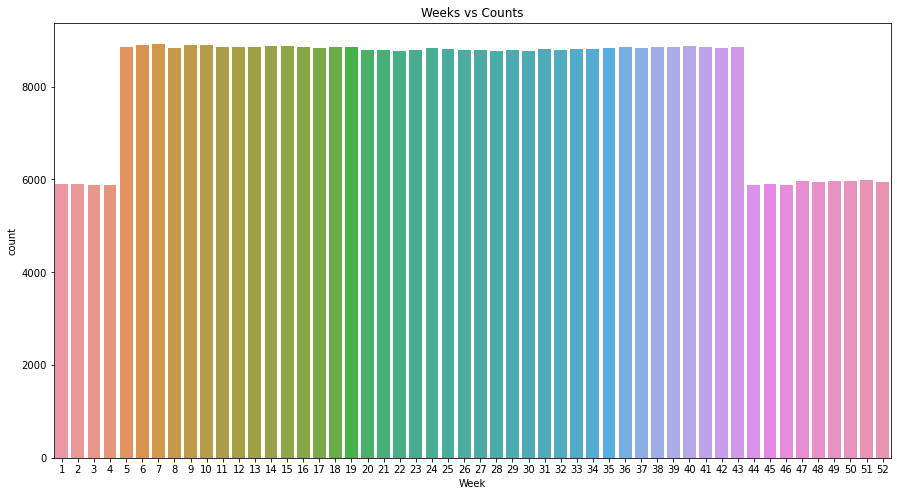

In [ ]:
# Count plot of weeks
plt.figure(figsize=(15,8))
sns.countplot(df['Week'])
plt.title('Weeks vs Counts')
plt.show()

##### Observation:
    From 1 to 4 and 44 to 52 weeks have less number of datapoints than other datapoints.

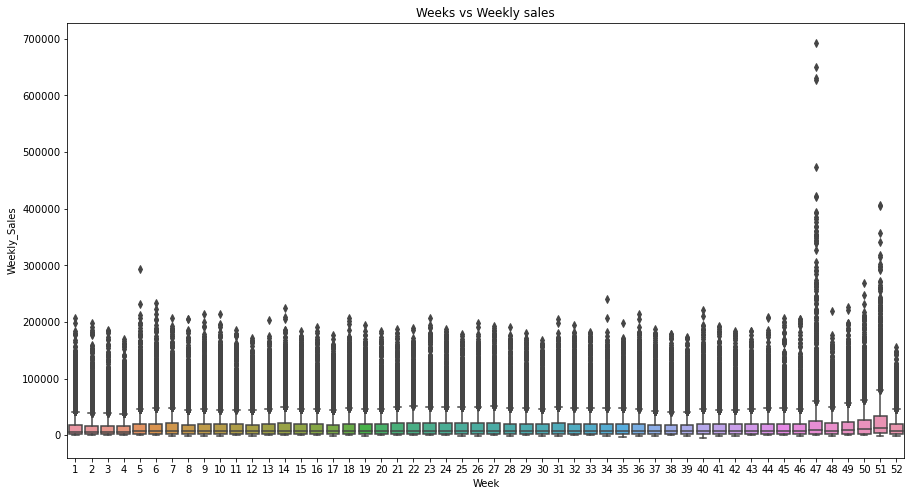

In [ ]:
# Box plot of weekly sales over weeks
plt.figure(figsize=(15,8))
sns.boxplot(df['Week'], df['Weekly_Sales'])
plt.title('Weeks vs Weekly sales')
plt.show()

##### Observation:
    Median of weekly sales is high in the end weeks of the year.

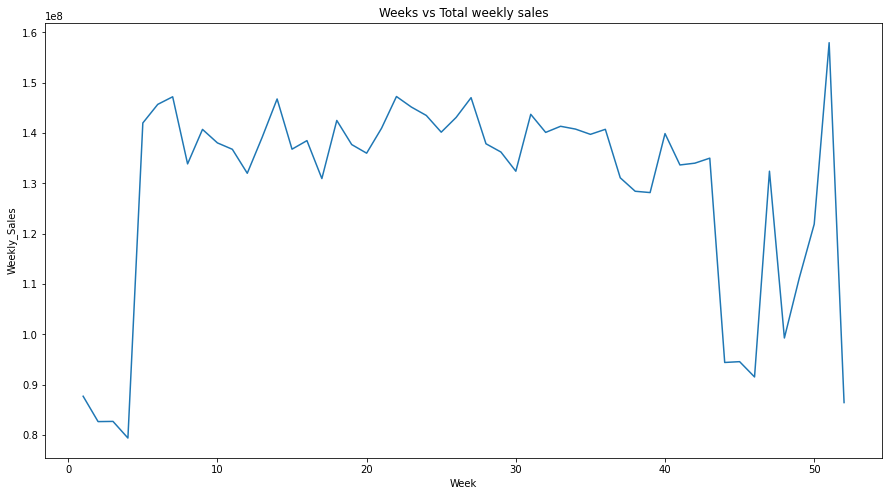

In [ ]:
# Grouping weeks and plotting total weekly sales
df1 = df.groupby('Week')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(df1['Week'], df1['Weekly_Sales'])
plt.title('Weeks vs Total weekly sales')
plt.show()

##### Observation:
    Total weekly sales in the end weeks of the year beacuse of holidays like Thanksgiving and Christmas and  
    sharp drop after that. In mid weeks, more number of datapoints hence high total weekly sales.

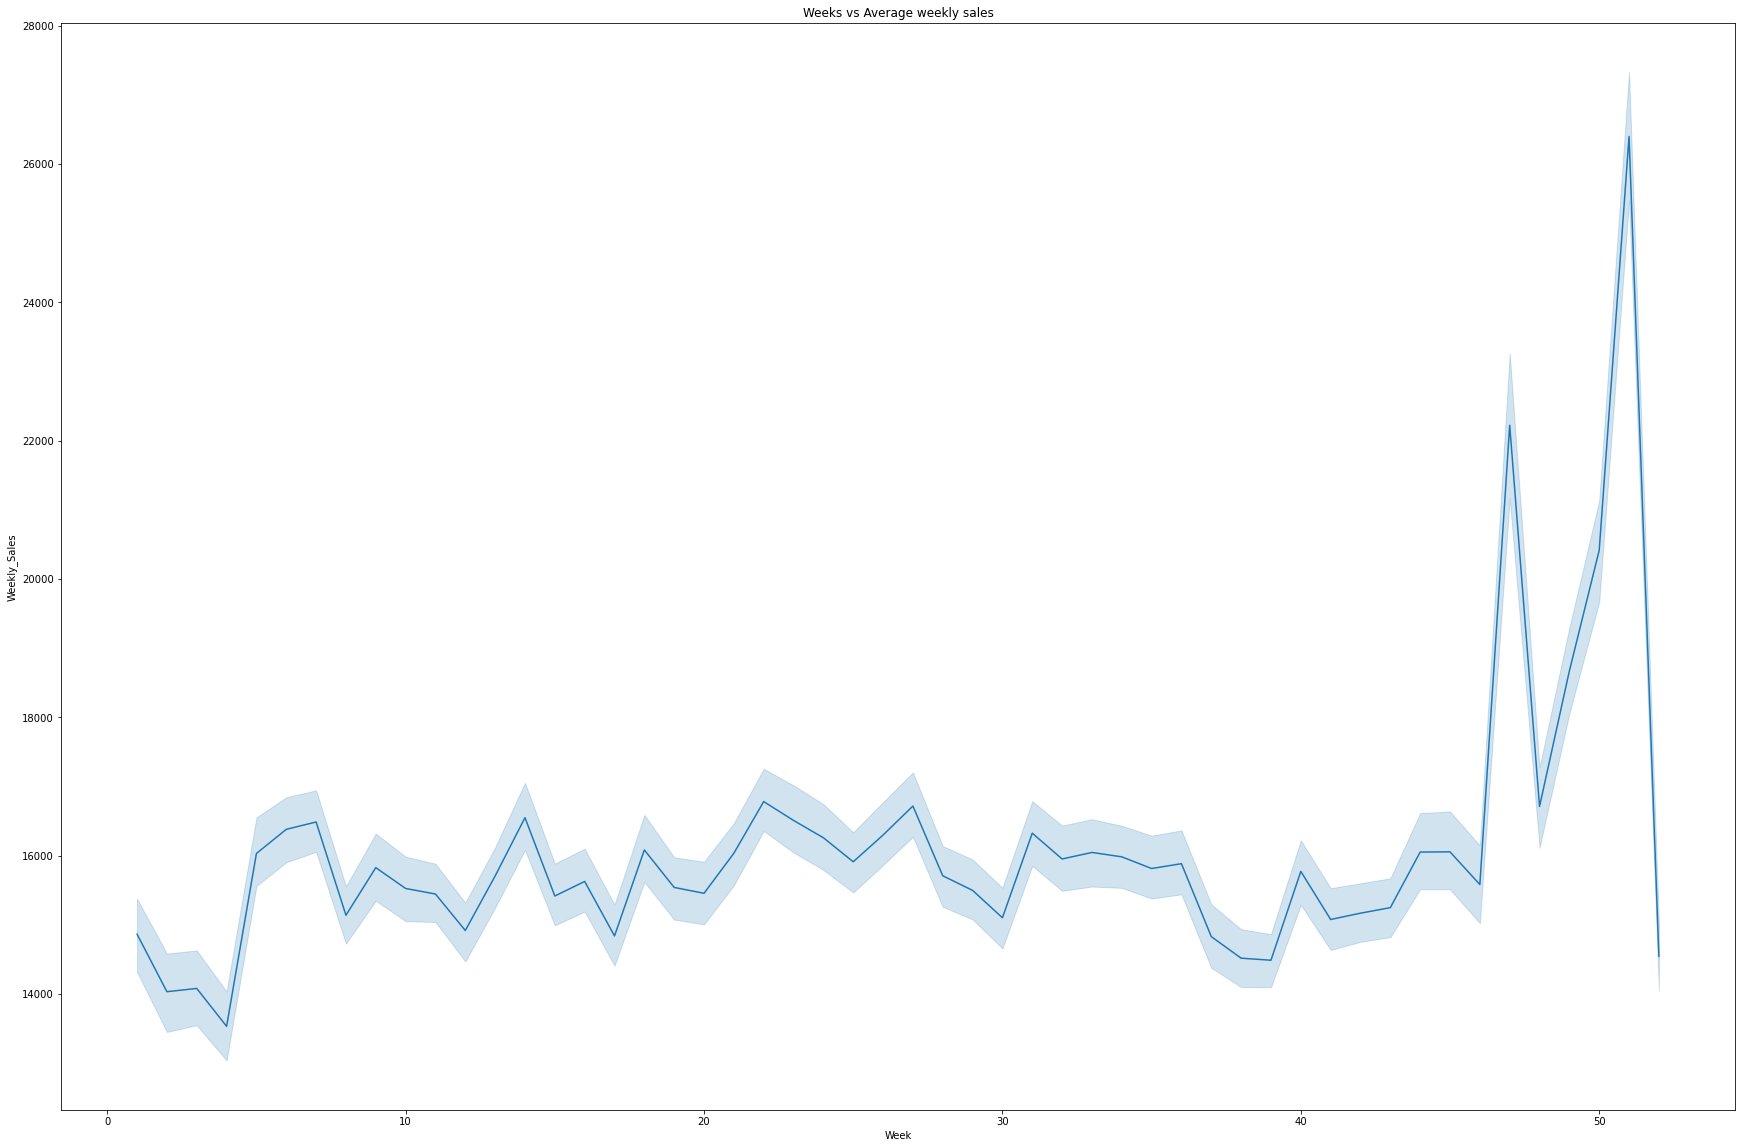

In [ ]:
# Bar plot of weekly sales over weeks of the year
plt.figure(figsize=(30,20))
sns.lineplot(df['Week'], df['Weekly_Sales'])
plt.title('Weeks vs Average weekly sales')
plt.show()

##### Observation:
    Average weekly sales is high in the end weeks of the year beacuse of holidays like Thanksgiving and Christmas but 
    sharp drop in average weekly sales after that.

### 2.Day

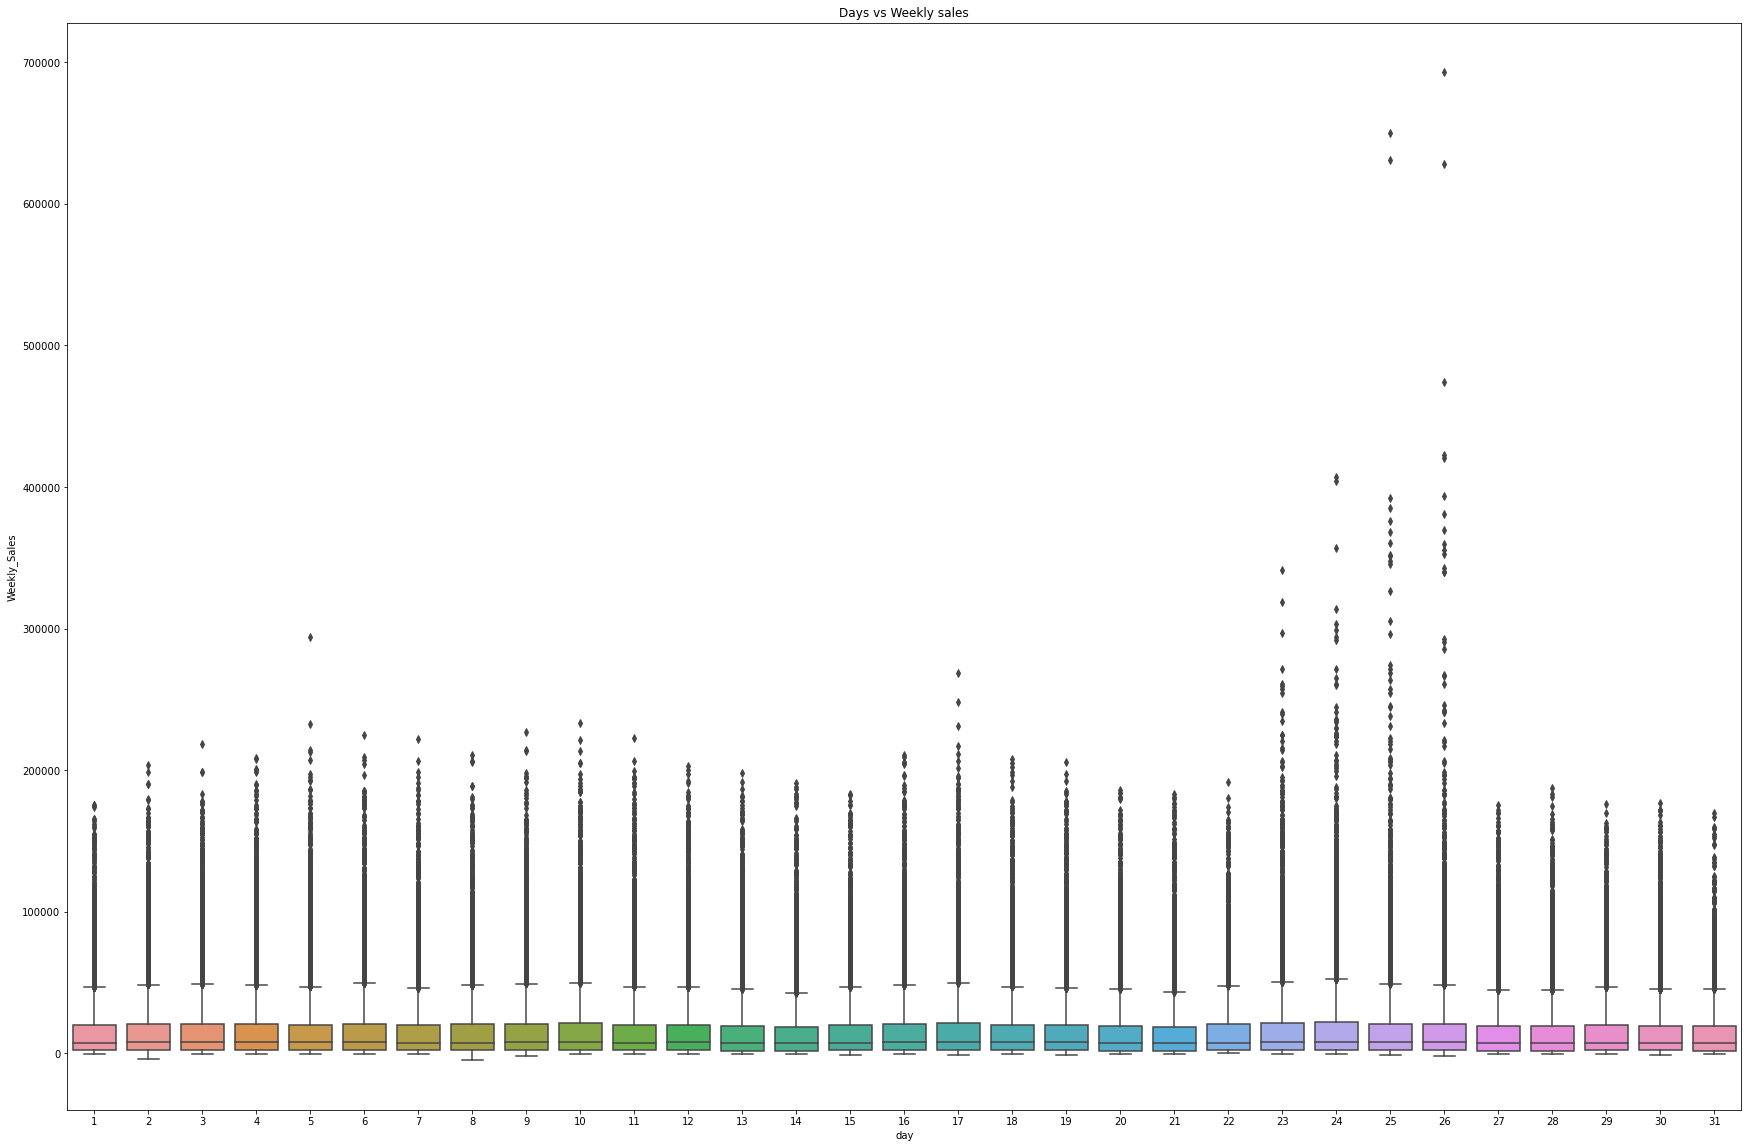

In [ ]:
plt.figure(figsize=(30,20))
sns.boxplot(df['day'], df['Weekly_Sales'])
plt.title('Days vs Weekly sales')
plt.show()

##### Observation:
    There are weekly sales of more than 300,000 on 23, 24 and 25 because of Thanksgiving and Christmas.

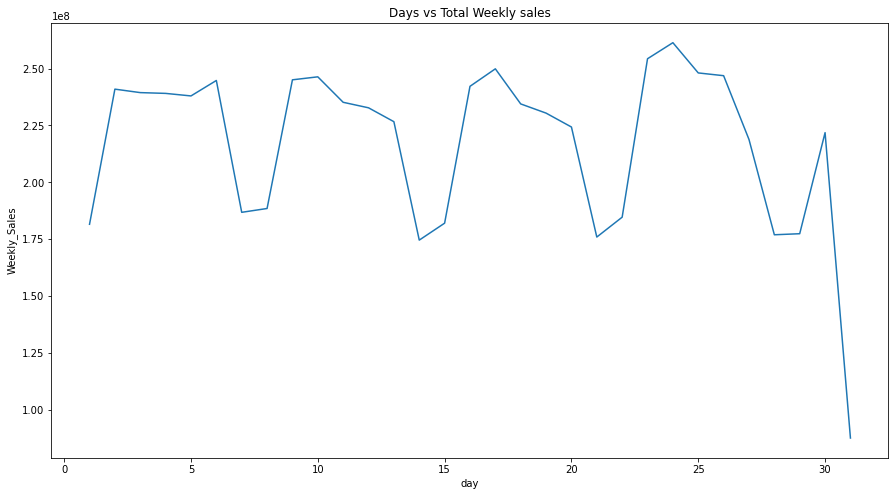

In [ ]:
# Grouping day and plotting total weekly sales over days
df1 = df.groupby('day')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(df1['day'], df1['Weekly_Sales'])
plt.title('Days vs Total Weekly sales')
plt.show()

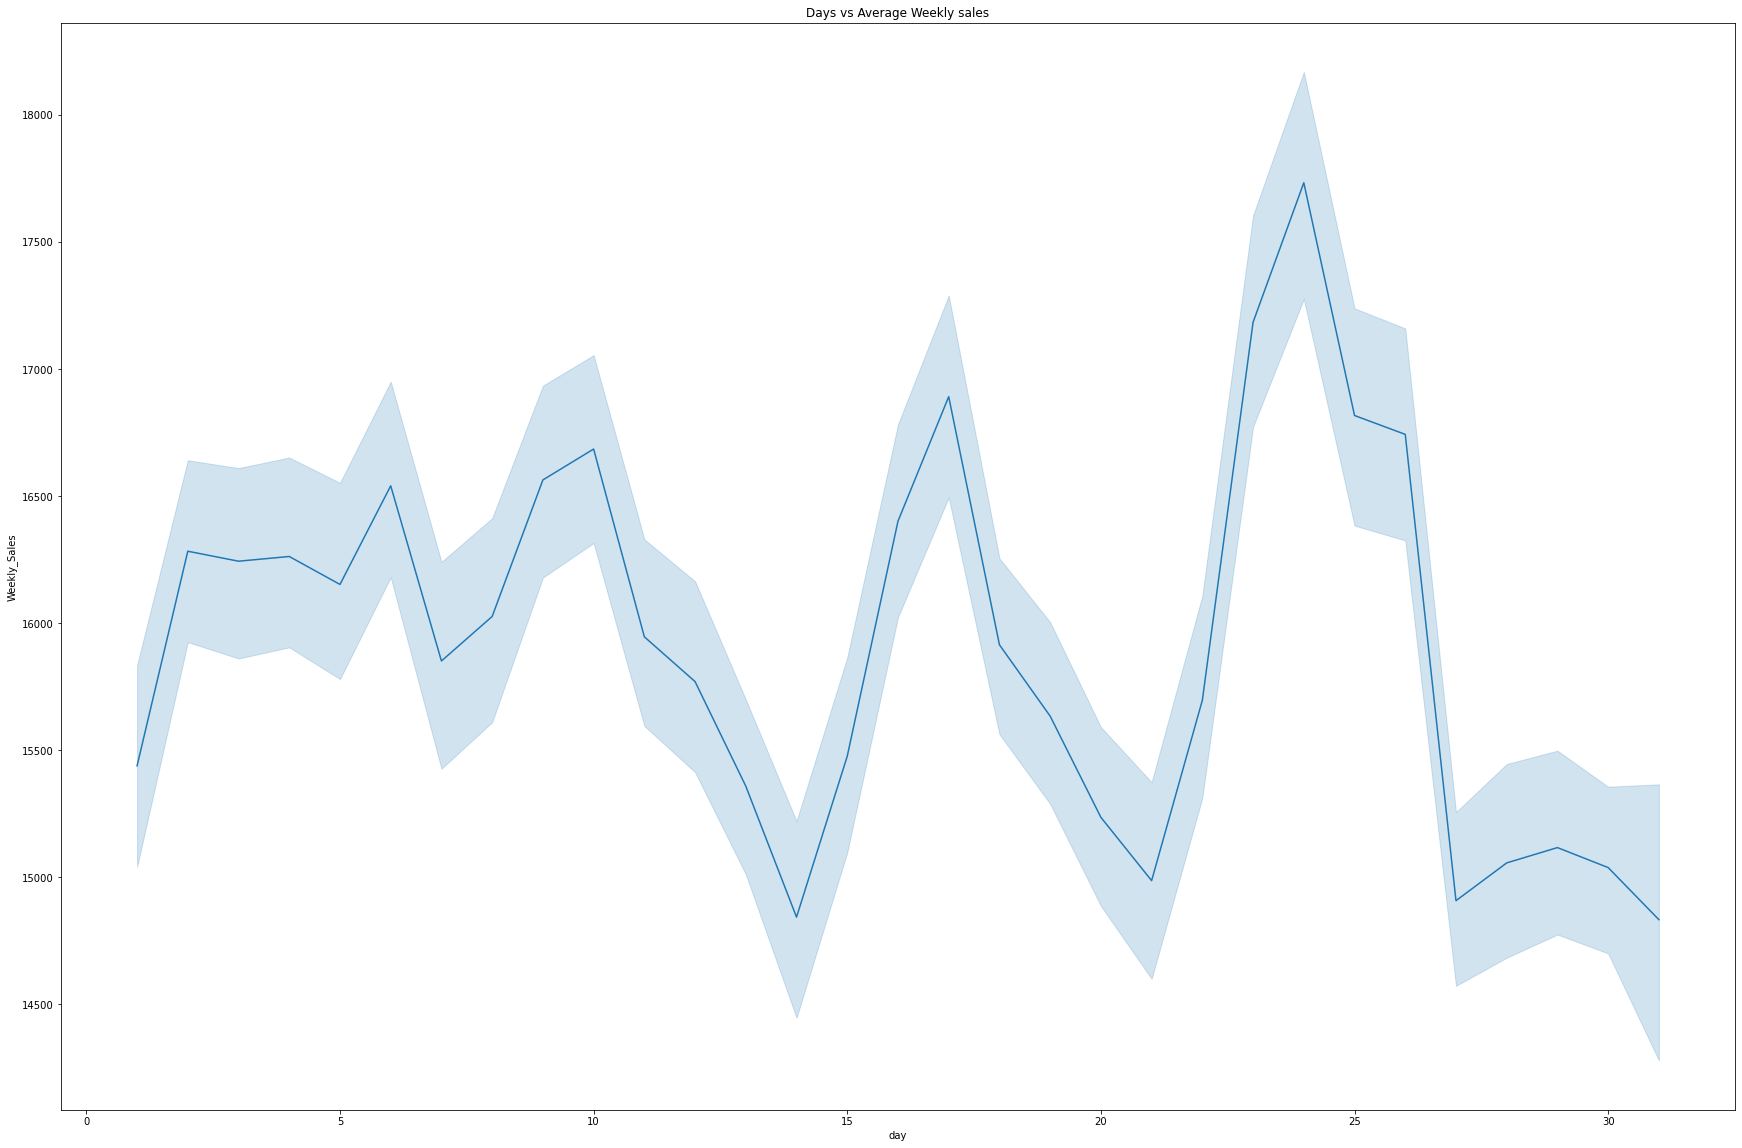

In [ ]:
# Line plot of average weekly sales over weeks
plt.figure(figsize=(30,20))
sns.lineplot(df['day'], df['Weekly_Sales'])
plt.title('Days vs Average Weekly sales')
plt.show()

##### Observation:
    High average weekly sales on 23rd, 24th and 25th because of Thanksgiving and Christmas.

### 3.Month

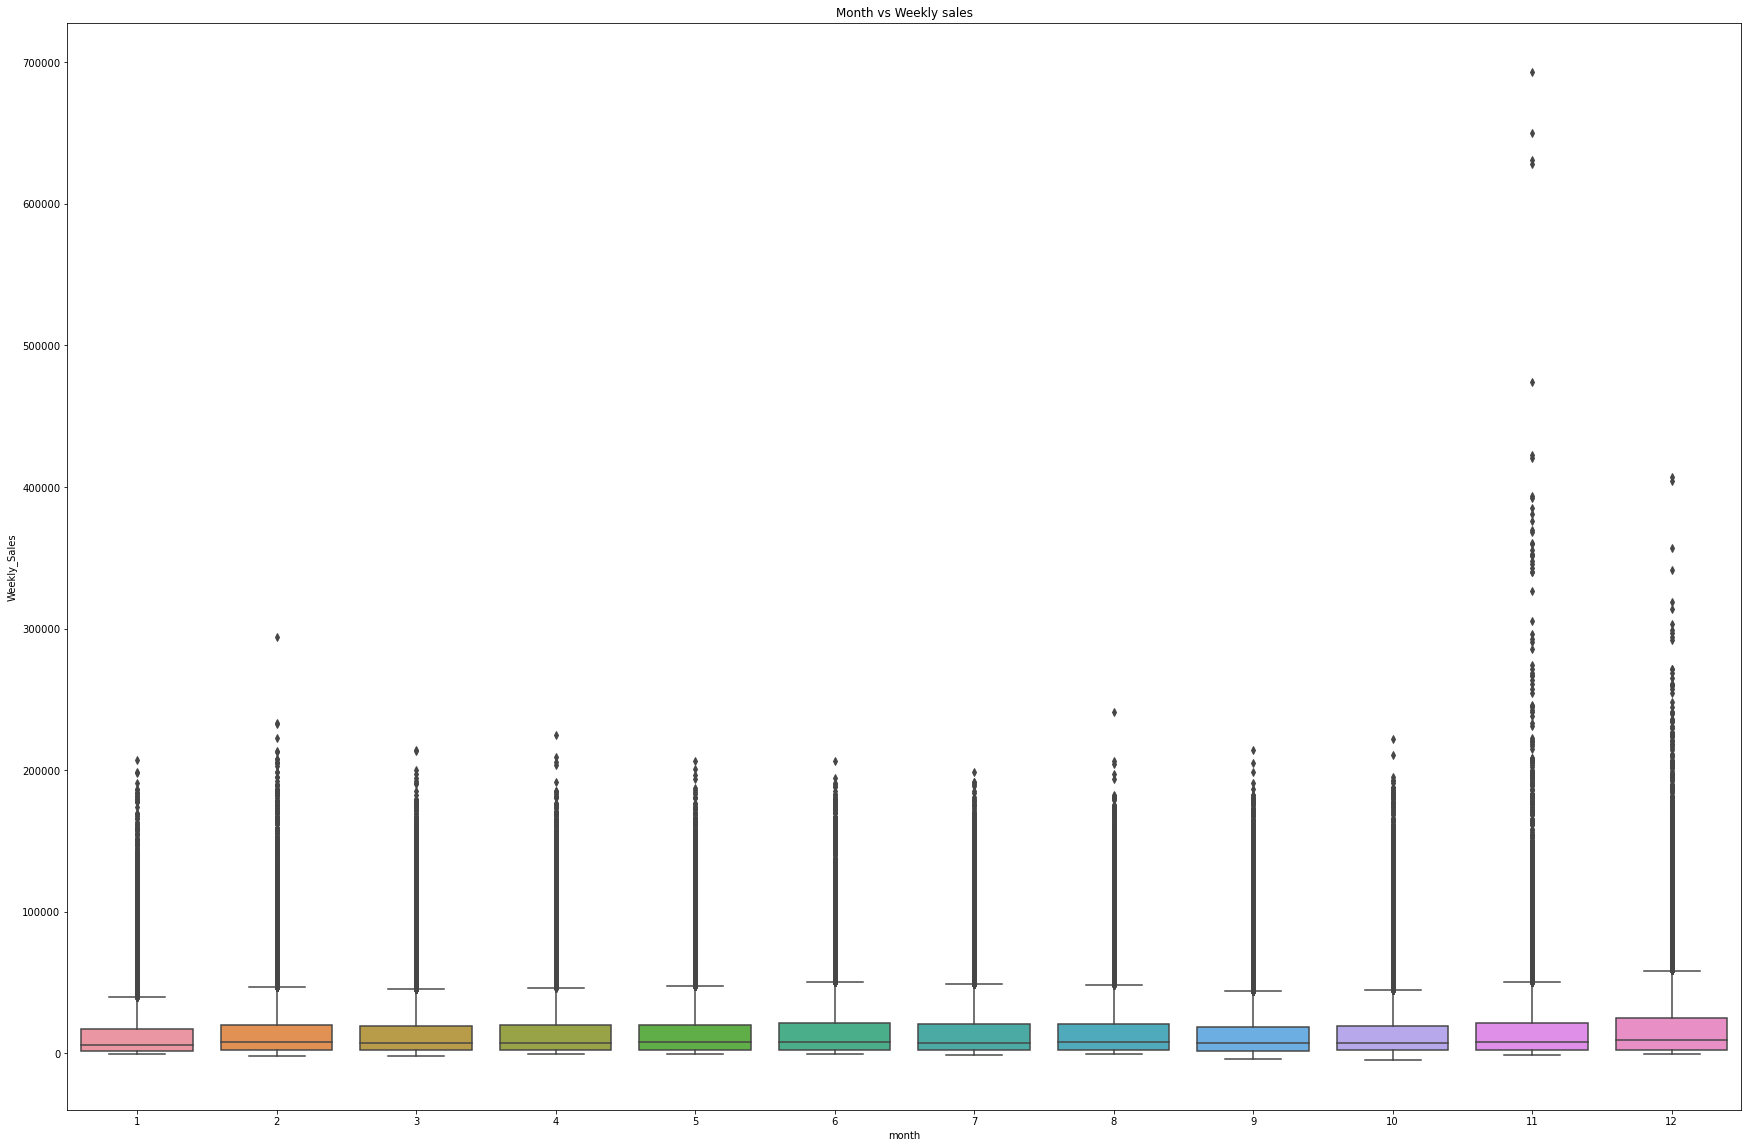

In [ ]:
# Box plot of average weekly sales over weeks
plt.figure(figsize=(30,20))
sns.boxplot(df['month'], df['Weekly_Sales'])
plt.title('Month vs Weekly sales')
plt.show()

##### Observation:
    1. Median and inter-quantile range of weekly sales is high in the last months of the year. 
    2. High weekly sales of more than 30000 in the month of november and december which is due to Thanksgiving 
    and Christmas.
    3. Weekly sales is little bit higher than other months in the month of febuary and september due to SuperBowl and Labor day.

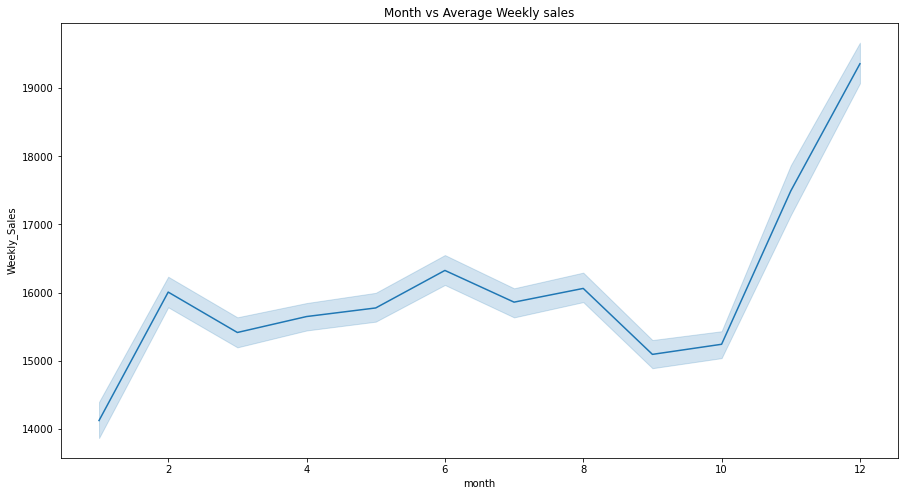

In [ ]:
# Line plot of average weekly sales over weeks
plt.figure(figsize=(15,8))
sns.lineplot(df['month'], df['Weekly_Sales'])
plt.title('Month vs Average Weekly sales')
plt.show()

##### Observation:
    High weekly sales in the month of november and december which is due to Thanksgiving 
    and Christmas.

### 4.Year

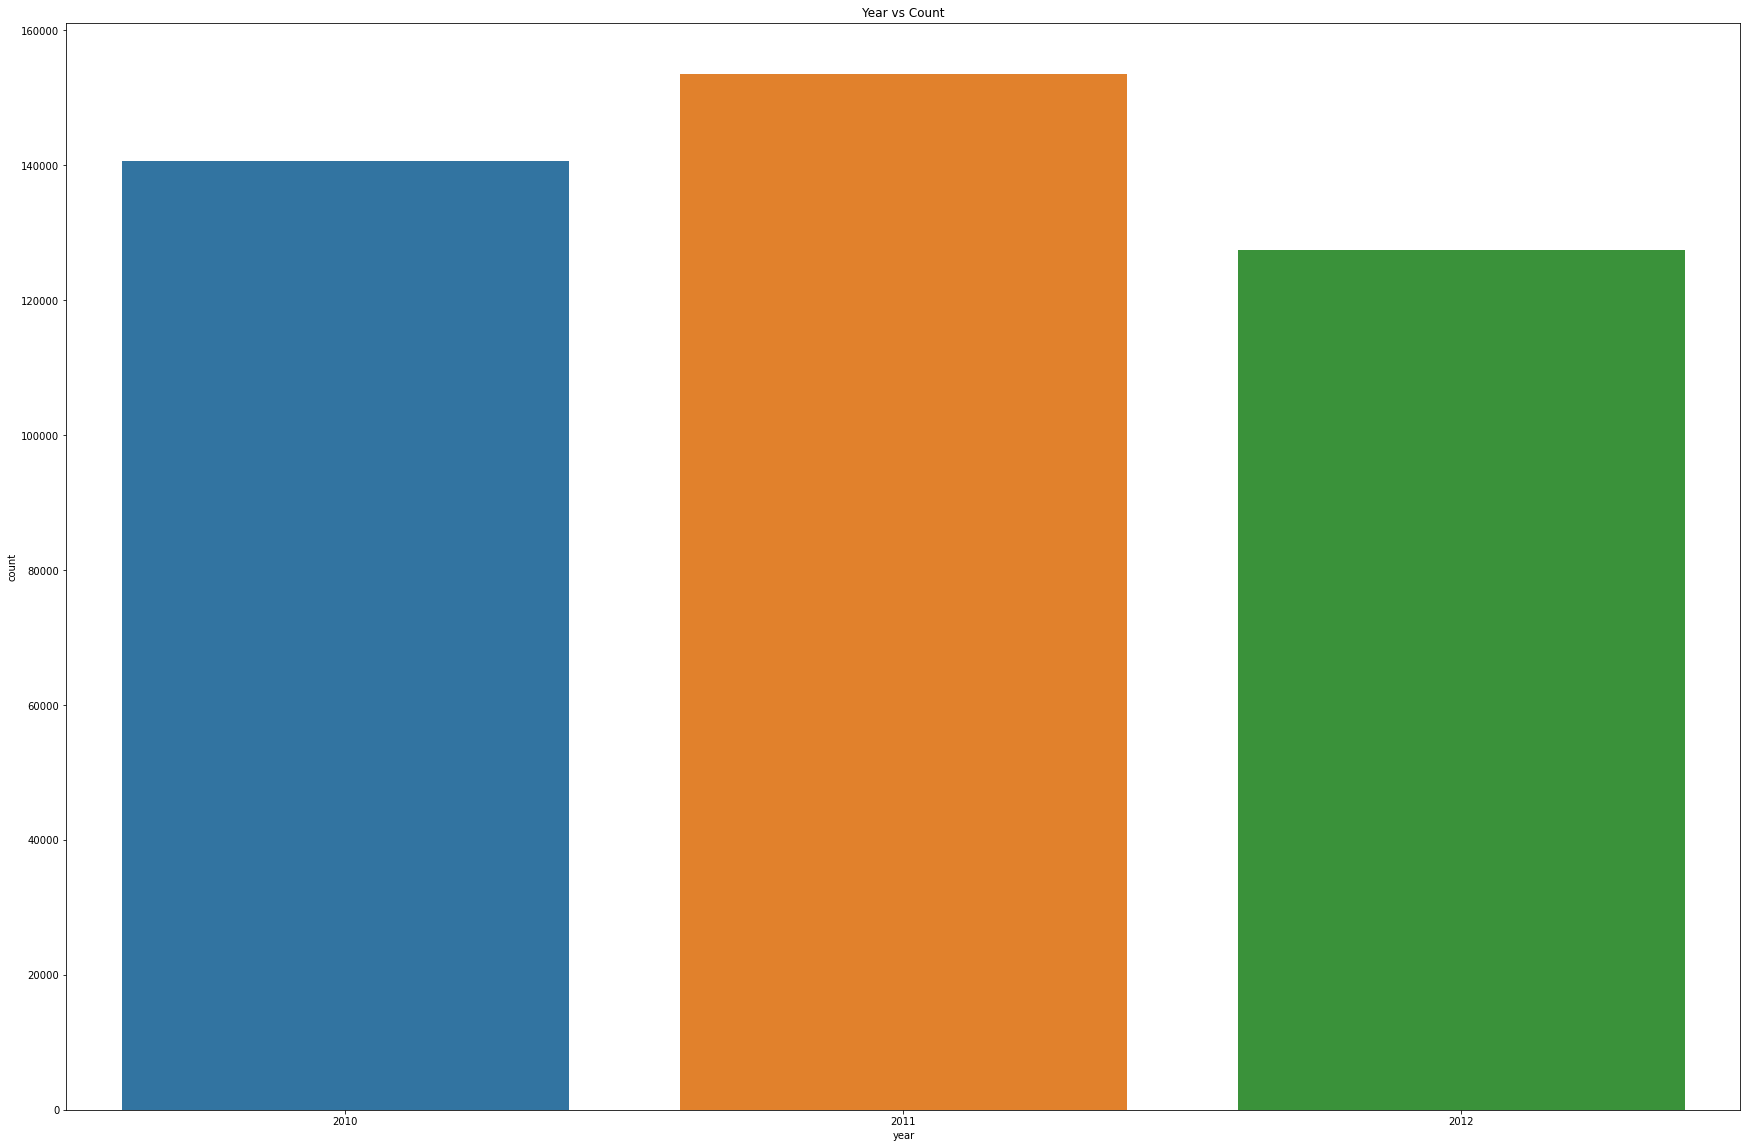

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(df['year'])
plt.title('Year vs Count')
plt.show()

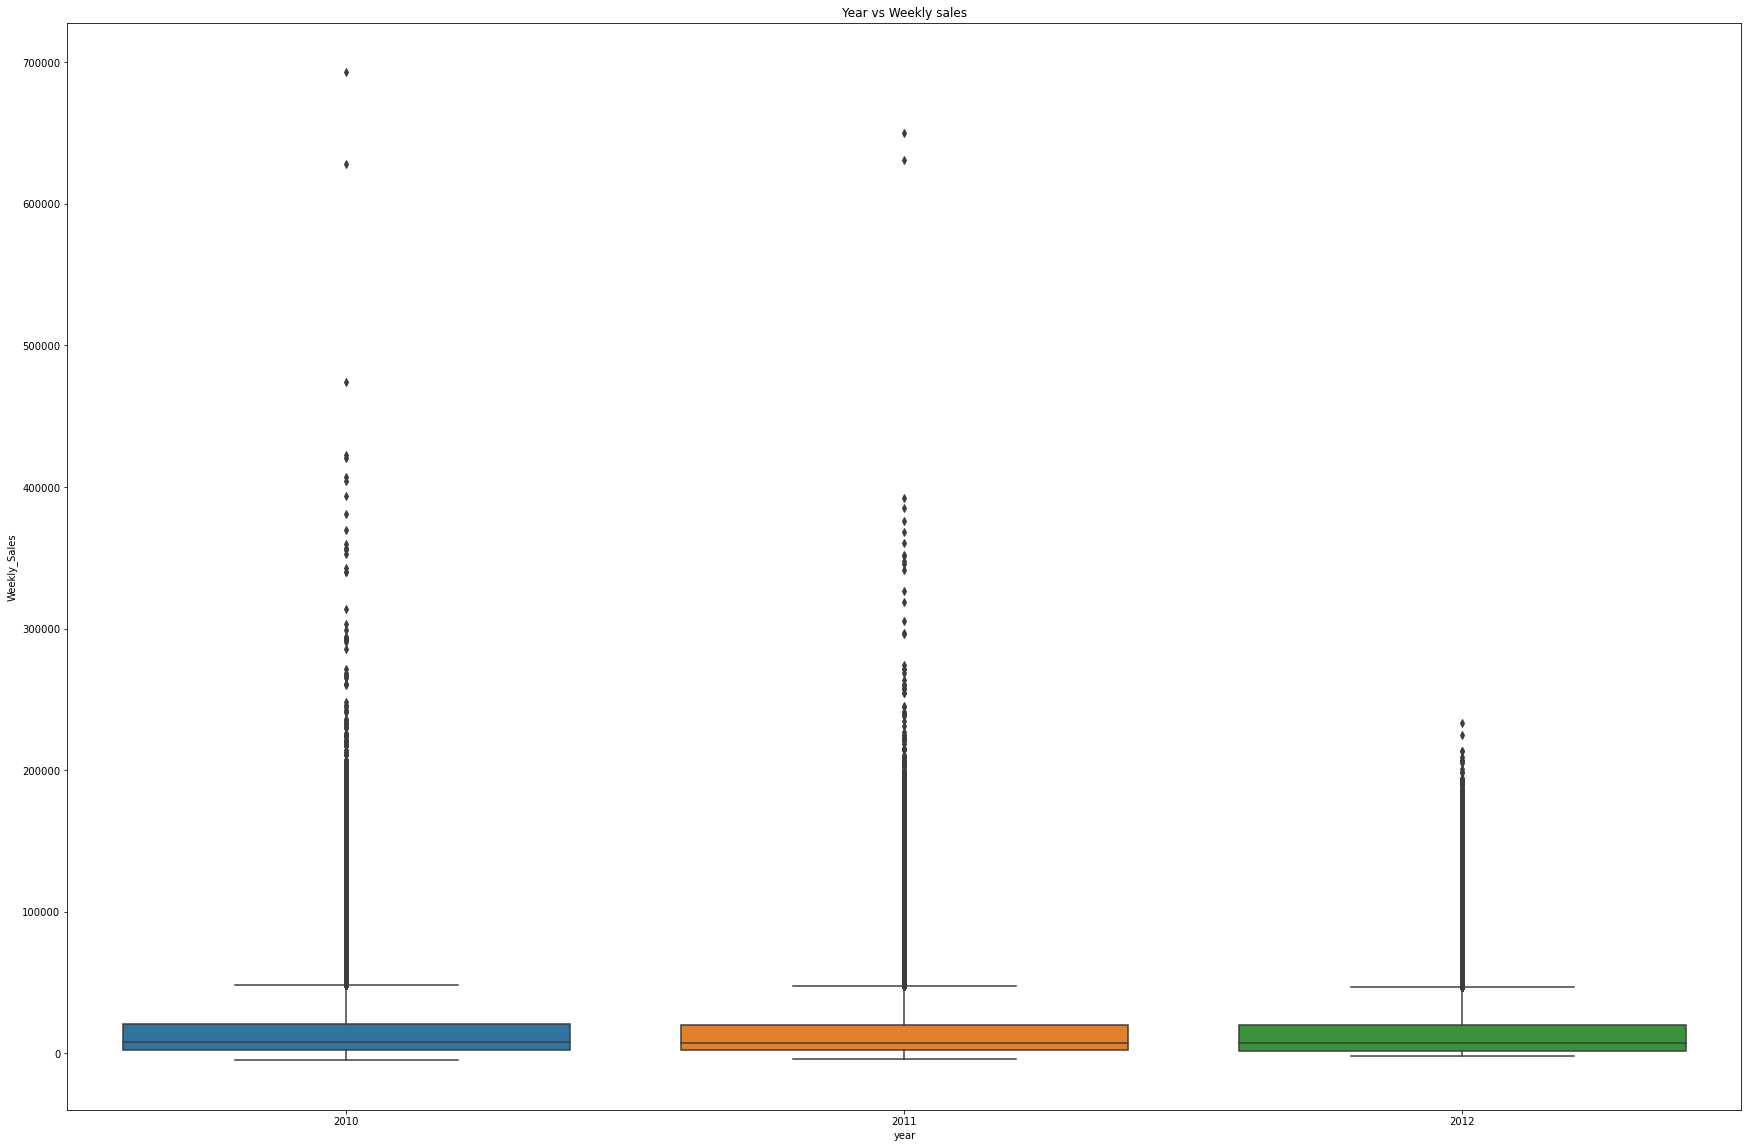

In [ ]:
plt.figure(figsize=(30,20))
sns.boxplot(df['year'], df['Weekly_Sales'])
plt.title('Year vs Weekly sales')
plt.show()

##### Observation:
    More number of outlier in year 2010 and less in 2012.

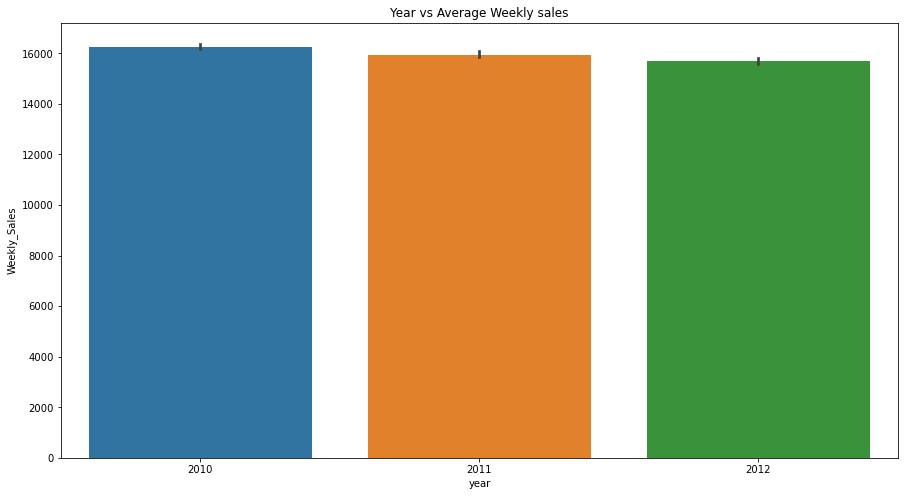

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['year'], df['Weekly_Sales'])
plt.title('Year vs Average Weekly sales')
plt.show()

##### Observation:
    High average weekly sales in year 2010 then weekly sales is decreasing over years.

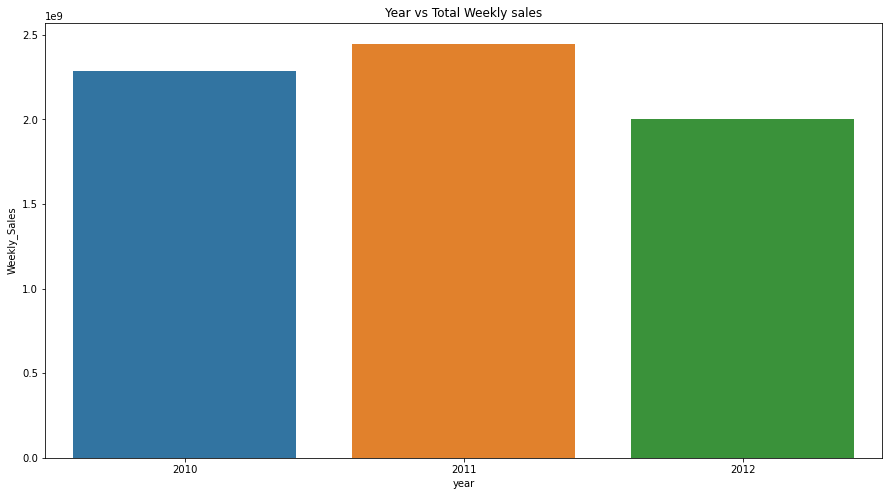

In [ ]:
df1 = df.groupby('year')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(df1['year'], df1['Weekly_Sales'])
plt.title('Year vs Total Weekly sales')
plt.show()

##### Observation:
    Total weekly sales in the year 2011 is highest because maximum no of datapoints of year 2011.

### 5. Holiday Type

In [ ]:
df1 = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
sales = 0
for i in superbowl_dates:
    if i in df1['Date'].values:
        x = (df1['Weekly_Sales'][df1['Date']==i]).values[0]
        sales +=x
print('SuperBowl sales: ',sales)

for i in laborday_dates:
    if i in df1['Date'].values:
        x = (df1['Weekly_Sales'][df1['Date']==i]).values[0]
        sales +=x
print('laborday sales: ',sales)

for i in thanksgiving_dates:
    if i in df1['Date'].values:
        x = (df1['Weekly_Sales'][df1['Date']==i]).values[0]
        sales +=x
print('thanksgiving sales: ',sales)

for i in christmas_dates:
    if i in df1['Date'].values:
        x = (df1['Weekly_Sales'][df1['Date']==i]).values[0]
        sales +=x
print('christmas sales: ',sales)

SuperBowl sales:  145682278.34
laborday sales:  286409963.02
thanksgiving sales:  418824571.52
christmas sales:  505299551.56


###### Christmas has highest sales and Superbowl has lowest. So we label encode according to the sales value.

In [61]:
def get_holiday_type(data):
    superbowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']
    laborday_dates = ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']
    thanksgiving_dates = ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']
    christmas_dates = ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
    def holiday_type(x):
        if x in christmas_dates:
            return 1
        elif x in thanksgiving_dates:
            return 2
        elif x in laborday_dates:
            return 3
        elif x in superbowl_dates:
            return 4
        else:
            return 0

    dates = data['Date']
    hol_type = dates.map(holiday_type)
    data['Holiday_Type'] = hol_type
    return data

In [ ]:
df = get_holiday_type(df)

In [ ]:
df[df['IsHoliday']==True].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,day,month,year,Week,Holiday_Type
73,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.24217,8.106,A,151315,12,2,2010,6,4
74,1,2,2010-02-12,44682.74,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.24217,8.106,A,151315,12,2,2010,6,4
75,1,3,2010-02-12,10887.84,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.24217,8.106,A,151315,12,2,2010,6,4
76,1,4,2010-02-12,35351.21,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.24217,8.106,A,151315,12,2,2010,6,4
77,1,5,2010-02-12,29620.81,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.24217,8.106,A,151315,12,2,2010,6,4


<AxesSubplot:xlabel='Holiday_Type', ylabel='count'>

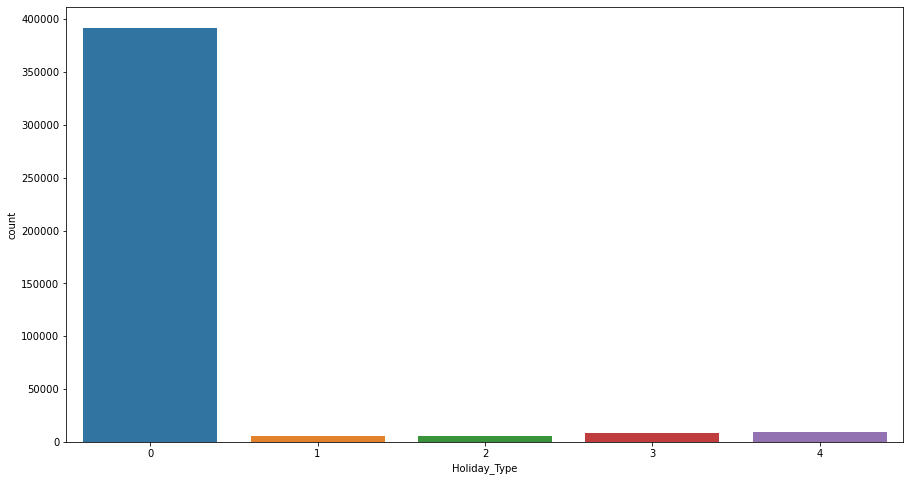

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Holiday_Type'])

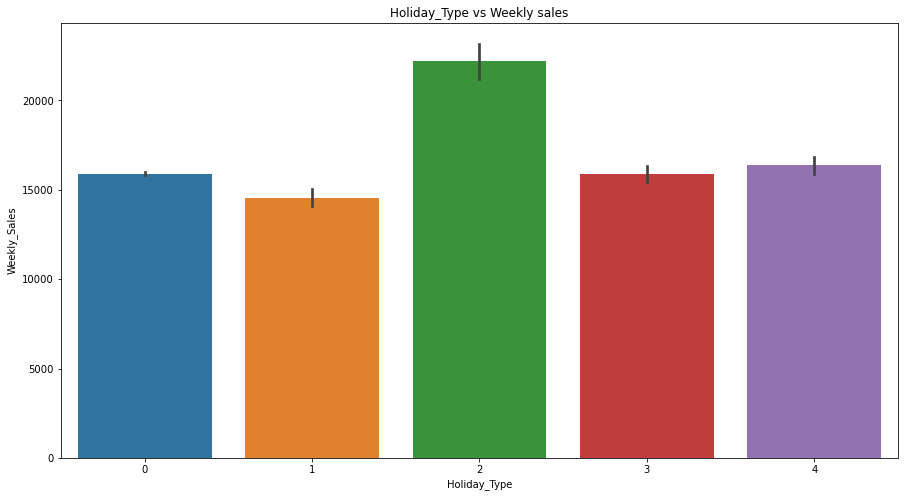

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['Holiday_Type'], df['Weekly_Sales'])
plt.title('Holiday_Type vs Weekly sales')
plt.show()

##### Observation:
    Weekly sales at the time of thanksgiving is maximum.

### 6. Temperature Binning

In [ ]:
print('Maximun temperature: ', df['Temperature'].max())
print('Minimun temperature: ', df['Temperature'].min())

Maximun temperature:  100.14
Minimun temperature:  -2.06


In [62]:
# Temperature categorizing
def temp_cat(data):
    
    def temp(x):
        if x<=-5:
            return -5
        elif x>-5 and x<=5:
            return 0
        elif x>5 and x<=15:
            return 10
        elif x>15 and x<=25:
            return 20
        elif x>25 and x<=35:
            return 30
        elif x>35 and x<=45:
            return 40
        elif x>45 and x<=55:
            return 50
        elif x>55 and x<=65:
            return 60
        elif x>65 and x<=75:
            return 70
        elif x>75 and x<=85:
            return 80
        elif x>85 and x<=95:
            return 90
        elif x>95 and x<=105:
            return 100
        else:
            return 110


    list_of_temp = data['Temperature']
    new_list = list_of_temp.map(temp)
    data['Temperature_Cat'] = new_list
    return data

In [ ]:
df = temp_cat(df)

In [ ]:
df[df['Dept']==5].head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,day,month,year,Week,Holiday_Type,Temperature_Cat
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,5,2,2010,5,0,40
77,1,5,2010-02-12,29620.81,True,38.51,2.548,NaN,NaN,NaN,...,211.242170,8.106,A,151315,12,2,2010,6,4,40
149,1,5,2010-02-19,26468.27,False,39.93,2.514,NaN,NaN,NaN,...,211.289143,8.106,A,151315,19,2,2010,7,0,40
222,1,5,2010-02-26,24101.89,False,46.63,2.561,NaN,NaN,NaN,...,211.319643,8.106,A,151315,26,2,2010,8,0,50
294,1,5,2010-03-05,23082.14,False,46.50,2.625,NaN,NaN,NaN,...,211.350143,8.106,A,151315,5,3,2010,9,0,50


<AxesSubplot:xlabel='Temperature_Cat', ylabel='Weekly_Sales'>

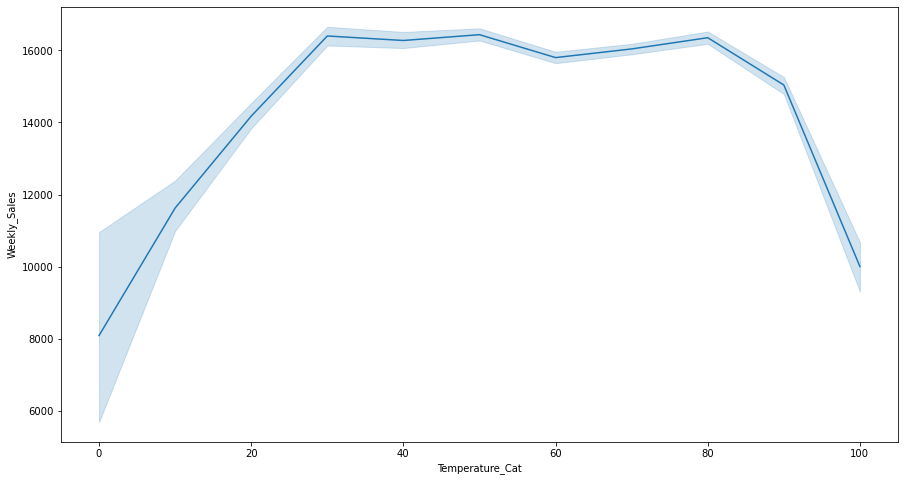

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Temperature_Cat'], df['Weekly_Sales'])

##### Observation: 
    If temperature is low or high weekly sales is low, if temperature is moderate then weekly sales is high.
    Hence, there is a small relationship between temperature and weekly sales.

In [ ]:
# label encoding based on weekly sales.

df1 = df.groupby('Temperature_Cat')['Weekly_Sales'].mean().reset_index()
df1 = df1.sort_values(by='Weekly_Sales', ascending=False)
tem = list(df1['Temperature_Cat'].values)
print(df1)

    Temperature_Cat  Weekly_Sales
5                50  16435.646415
3                30  16399.235837
8                80  16351.515565
4                40  16274.574617
7                70  16040.445248
6                60  15799.870588
9                90  15039.005408
2                20  14175.379301
1                10  11625.497370
10              100  10001.402646
0                 0   8087.358986


### 7. Fuel Price Binning

In [ ]:
print('Maximun Fuel_Price: ', df['Fuel_Price'].max())
print('Minimun Fuel_Price: ', df['Fuel_Price'].min())

Maximun Fuel_Price:  4.468
Minimun Fuel_Price:  2.472


In [63]:
# Fuel Price categorizing
def fuel_cat(data):
    def fuel(x):
        if x<=2:
            return 2
        elif x>2 and x<=2.5:
            return 2.5
        elif x>2.5 and x<=3:
            return 3
        elif x>3 and x<=3.5:
            return 3.5
        elif x>3.5 and x<=4:
            return 4
        else:
            return 5


    list_of_fuel = data['Fuel_Price']
    new_list = list_of_fuel.map(fuel)
    data['Fuel_Price_Cat'] = new_list
    return data

In [ ]:
df = fuel_cat(df)

<AxesSubplot:xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

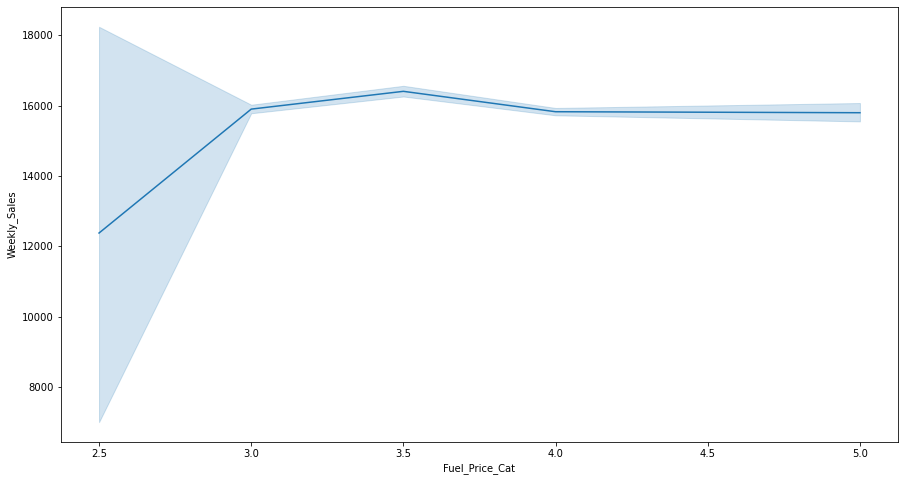

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Fuel_Price_Cat'], df['Weekly_Sales'])

##### Observation: 
    If fuel is low weekly sales is low, if fuel is moderate then weekly sales is slightly high.
    Hence, there is a small relationship between fuel and weekly sales.

In [ ]:
# label encoding based on weekly sales.

df1 = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].mean().reset_index()
df1 = df1.sort_values(by='Weekly_Sales', ascending=False)
fuel_list = list(df1['Fuel_Price_Cat'].values)
print(df1)

   Fuel_Price_Cat  Weekly_Sales
2             3.5  16405.096859
1             3.0  15899.339909
3             4.0  15825.166233
4             5.0  15796.836058
0             2.5  12375.816579


In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,5,2,2010,5,0,50,2.5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,5,2,2010,5,0,50,2.5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,5,2,2010,5,0,50,2.5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,5,2,2010,5,0,50,2.5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,5,2,2010,5,0,50,2.5


### 8. Holiday Month Categories

In [ ]:
df1 = df['month'][df['IsHoliday']==True].reset_index()
holiday_months = list(set(df1['month']))
print(holiday_months)

[9, 2, 11, 12]


In [ ]:
# Taking mean but not sum because months have more no of datapoints will have more weekly sales.
df1 = df.groupby(['month'])['Weekly_Sales'].mean().reset_index()
for i in holiday_months:
    print(df1[df1['month']==i])

   month  Weekly_Sales
8      9  15095.886154
   month  Weekly_Sales
1      2  16008.779217
    month  Weekly_Sales
10     11  17491.031424
    month  Weekly_Sales
11     12  19355.702141


In [64]:
def get_holiday_month(data):
    def holiday_month(x):
        if x ==12:
            return 1
        elif x==11:
            return 2
        elif x==2:
            return 3
        elif x==9:
            return 4
        else:
            return 0

    list_of_months = data['month']
    mapped_months = list_of_months.map(holiday_month)
    data['Holiday_Month'] = mapped_months
    return data

In [ ]:
df = get_holiday_month(df)

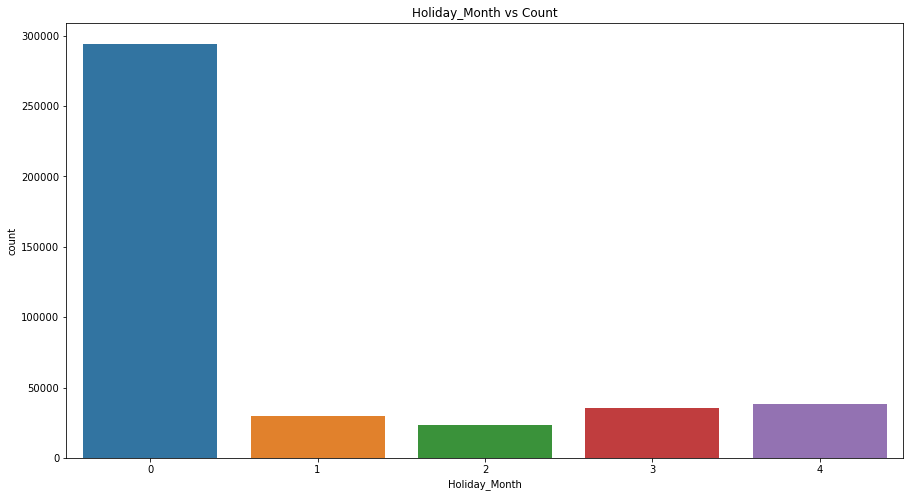

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Holiday_Month'])
plt.title('Holiday_Month vs Count')
plt.show()

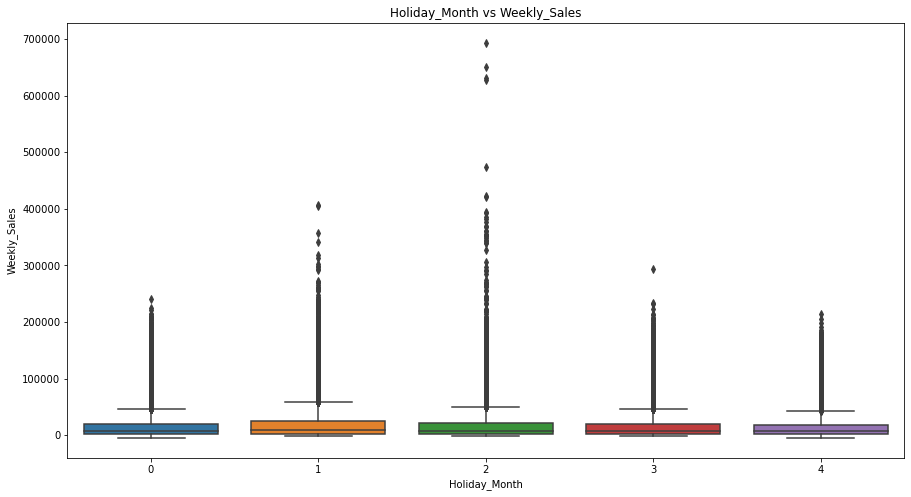

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Holiday_Month'], df['Weekly_Sales'])
plt.title('Holiday_Month vs Weekly_Sales')
plt.show()

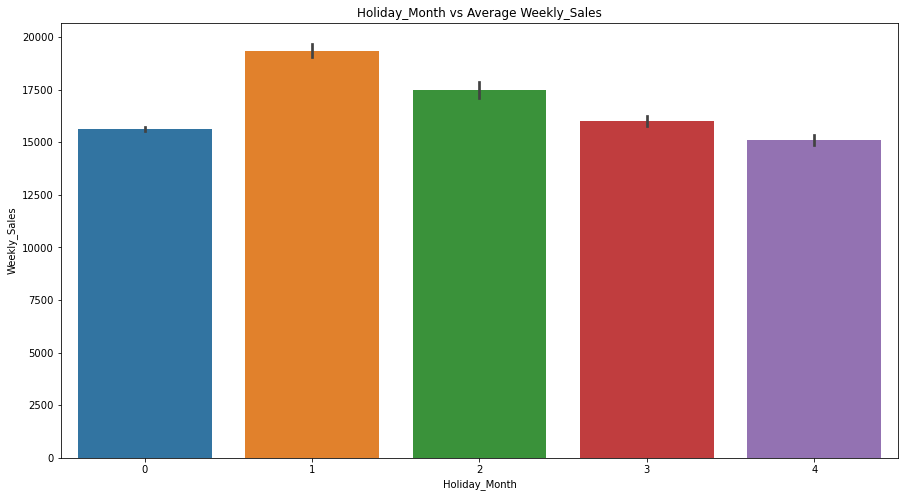

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['Holiday_Month'], df['Weekly_Sales'])
plt.title('Holiday_Month vs Average Weekly_Sales')
plt.show()

##### Observation:
    1. Usually, sales of whole month is high when there is a holiday/festival in that month.
    2. We can observe that, in holiday months weekly sales is high.

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,0,40,3.0,3
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,0,40,3.0,3
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,0,40,3.0,3
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,0,40,3.0,3
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,0,40,3.0,3


### 9. Week of the month

In [65]:
# https://stackoverflow.com/questions/3806473/week-number-of-the-month#:~:text=import%20calendar%0Aimport%20numpy%20as%20np%0Acalendar.setfirstweekday(6)%0A%0Adef%20get_week_of_month(year%2C%20month%2C%20day)%3A%0A%20%20%20%20x%20%3D%20np.array(calendar.monthcalendar(year%2C%20month))%0A%20%20%20%20week_of_month%20%3D%20np.where(x%3D%3Dday)%5B0%5D%5B0%5D%20%2B%201%0A%20%20%20%20return(week_of_month)%0A%0Aget_week_of_month(2015%2C9%2C14)
import calendar

def get_week_of_month(data):
    week_of_the_month = []
    for day, month, year in zip(data['day'], data['month'], data['year']):
        x = np.array(calendar.monthcalendar(year, month))
        week = np.where(x==day)[0][0] + 1
        week_of_the_month.append(week)
    data['Week_of_the_month'] = week_of_the_month
    return data

In [ ]:
df = get_week_of_month(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,151315,5,2,2010,5,0,40,3.0,3,1
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,151315,5,2,2010,5,0,40,3.0,3,1
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,151315,5,2,2010,5,0,40,3.0,3,1
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,151315,5,2,2010,5,0,40,3.0,3,1
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,151315,5,2,2010,5,0,40,3.0,3,1


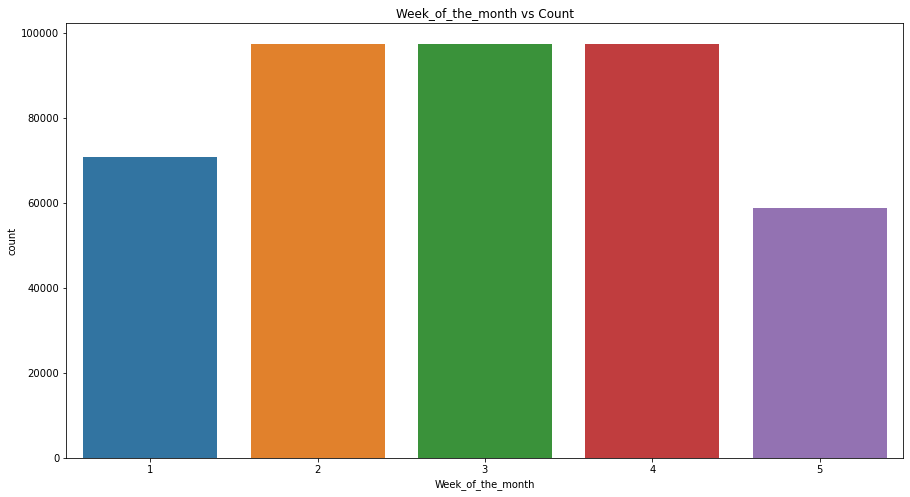

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Week_of_the_month'])
plt.title('Week_of_the_month vs Count')
plt.show()

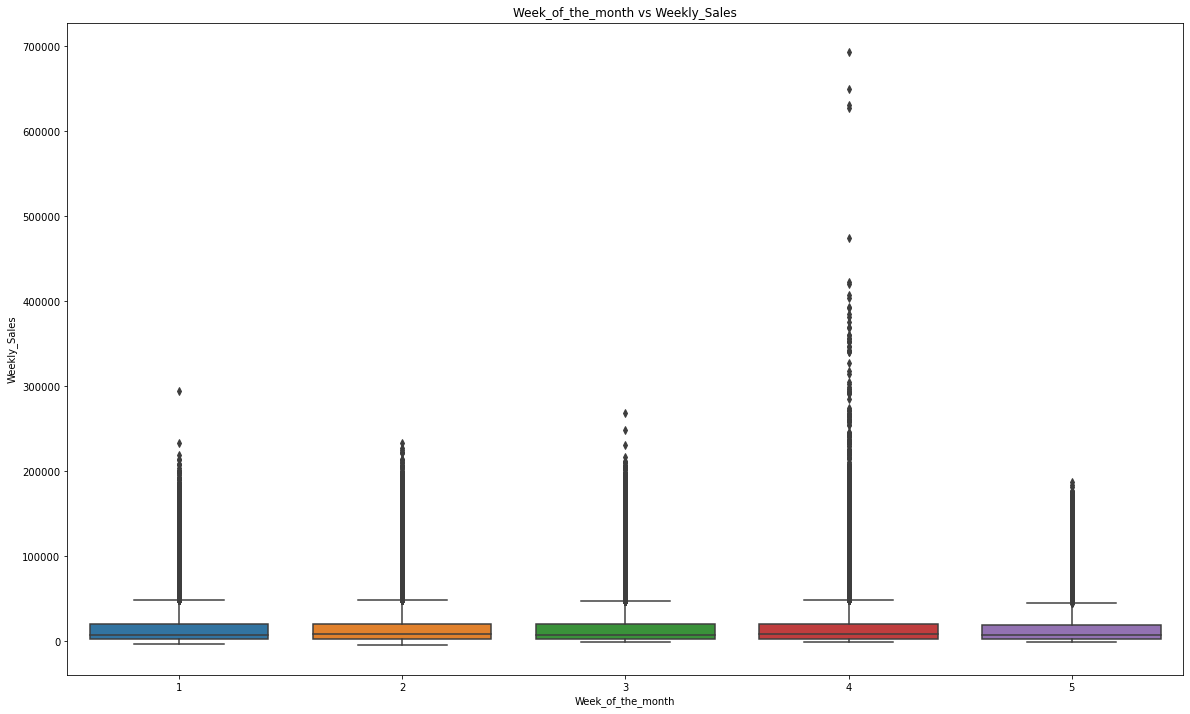

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(df['Week_of_the_month'], df['Weekly_Sales'])
plt.title('Week_of_the_month vs Weekly_Sales')
plt.show()

##### Observation:
    People tend to spend more in the 1st week than last week. 
    We can observe that a few high sales are made in 1st week and many high sales are made in 4th week of the month

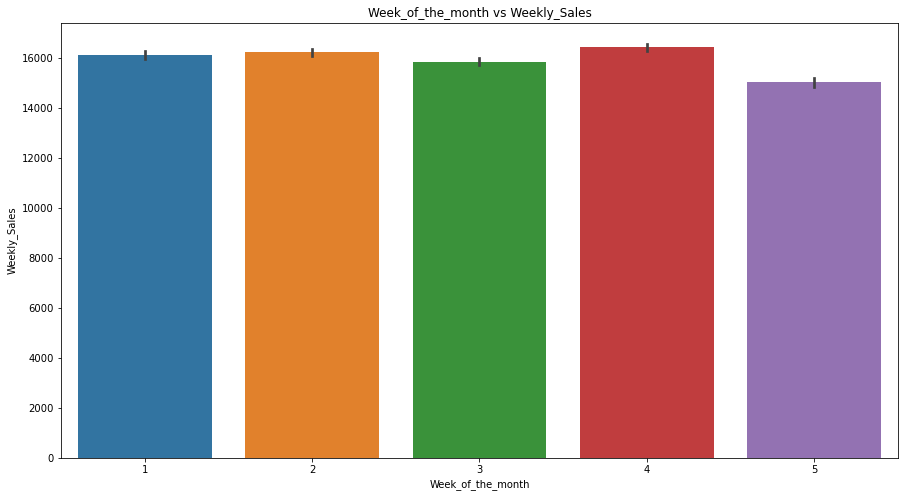

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['Week_of_the_month'], df['Weekly_Sales'])
plt.title('Week_of_the_month vs Weekly_Sales')
plt.show()

##### Observation:
    1. We can observe that high average weekly sales in 1st, 2nd and 4th week of the month and low 
    average weekly sales in the last week of the month.
    2. High average weekly sales in 4th week because of thanksgiving and christmas.

### 10. No of weeks left for holiday week

#### 10.1 No of weeks left for christmas

In [ ]:
df1 = df.groupby(['Holiday_Type','Week'])['Weekly_Sales'].count()
df1

Holiday_Type  Week
0             1       5903
              2       5894
              3       5877
              4       5871
              5       8858
              7       8929
              8       8844
              9       8892
              10      8892
              11      8856
              12      8850
              13      8861
              14      8869
              15      8874
              16      8863
              17      8826
              18      8861
              19      8862
              20      8800
              21      8791
              22      8775
              23      8793
              24      8826
              25      8810
              26      8781
              27      8795
              28      8777
              29      8791
              30      8769
              31      8804
              32      8785
              33      8809
              34      8809
              35      8837
              37      8842
              38      8848
         

##### Observation:
    Every year week no of the year is same.

In [ ]:
print('First date in data: ',df['Date'].min())
print('Last date in data: ', df['Date'].max())

First date in data:  2010-02-05
Last date in data:  2012-10-26


In [66]:
def get_weeks_for_christmas(data):
    no_of_weeks_left_list = []
    for i in data['Week']:
        week_of_christmas = 52
        no_of_weeks_left = week_of_christmas - i
        if no_of_weeks_left>=0:
            no_of_weeks_left_list.append(no_of_weeks_left)
        else:
            no_of_weeks_left_list.append(no_of_weeks_left+53)
    data['weeks_for_christmas'] = no_of_weeks_left_list
    return data

In [ ]:
df = get_weeks_for_christmas(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,5,2,2010,5,0,40,3.0,3,1,47
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,5,2,2010,5,0,40,3.0,3,1,47
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,5,2,2010,5,0,40,3.0,3,1,47
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,5,2,2010,5,0,40,3.0,3,1,47
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,5,2,2010,5,0,40,3.0,3,1,47


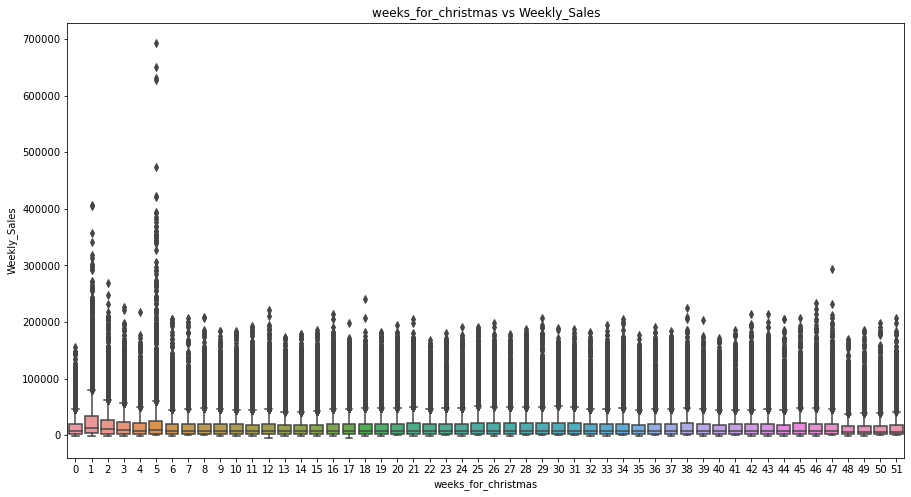

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['weeks_for_christmas'], df['Weekly_Sales'])
plt.title('weeks_for_christmas vs Weekly_Sales')
plt.show()

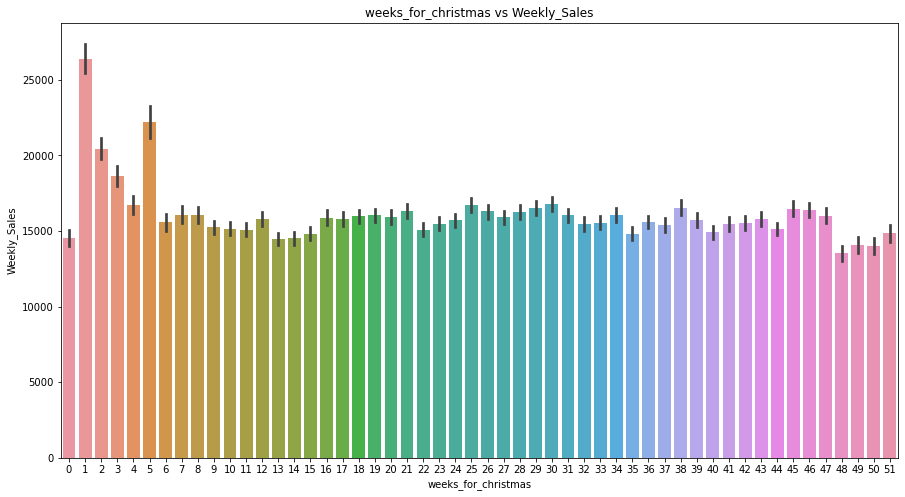

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['weeks_for_christmas'], df['Weekly_Sales'])
plt.title('weeks_for_christmas vs Weekly_Sales')
plt.show()

##### Observation:
    Median of weekly sales is high when no of weeks left for christmas is low.
    Average weekly sales is high when no of weeks left for christmas is low.
    Average weekly sales is low when christmas week.

#### 10.2 No of weeks left for thanksgiving

In [67]:
def get_weeks_for_thanksgiving(data):
    no_of_weeks_left_list = []
    for i in data['Week']:
        week_of_thanksgiving = 47
        no_of_weeks_left = week_of_thanksgiving - i
        if no_of_weeks_left>=0:
            no_of_weeks_left_list.append(no_of_weeks_left)
        else:
            no_of_weeks_left_list.append(no_of_weeks_left+53)
    data['weeks_for_thanksgiving'] = no_of_weeks_left_list
    return data

In [ ]:
df = get_weeks_for_thanksgiving(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,2,2010,5,0,40,3.0,3,1,47,42
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,2,2010,5,0,40,3.0,3,1,47,42
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,2,2010,5,0,40,3.0,3,1,47,42
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,2,2010,5,0,40,3.0,3,1,47,42
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,2,2010,5,0,40,3.0,3,1,47,42


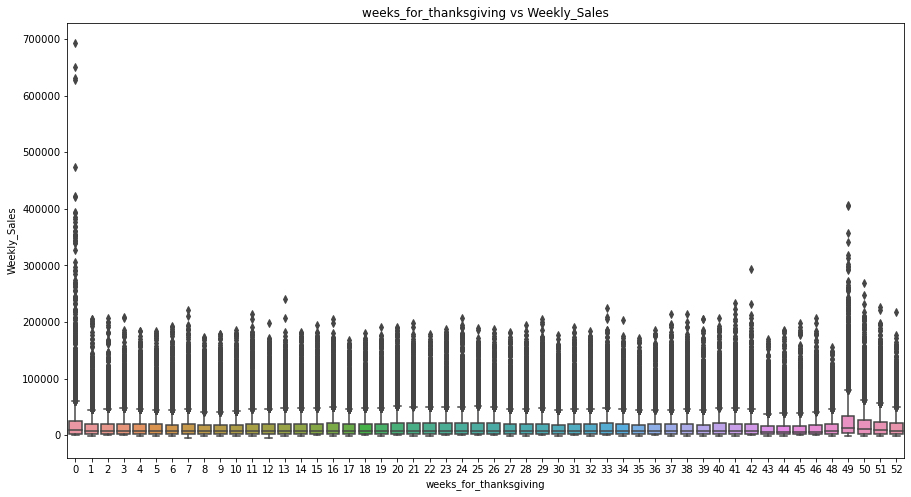

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['weeks_for_thanksgiving'], df['Weekly_Sales'])
plt.title('weeks_for_thanksgiving vs Weekly_Sales')
plt.show()

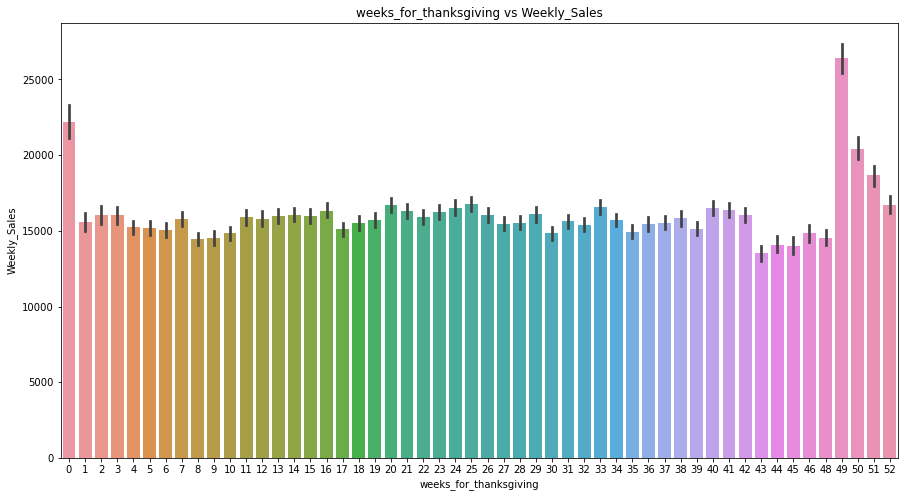

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['weeks_for_thanksgiving'], df['Weekly_Sales'])
plt.title('weeks_for_thanksgiving vs Weekly_Sales')
plt.show()

##### Observation:
    Weekly sales is high when thankgiving week.
    When 49 and 50 weeks left, weekly sales is high because of christmas week is near.

#### 10.2 No of weeks left for laborday

In [68]:
def get_weeks_for_laborday(data):
    no_of_weeks_left_list = []
    for i in data['Week']:
        week_of_laborday = 36
        no_of_weeks_left = week_of_laborday - i
        if no_of_weeks_left>=0:
            no_of_weeks_left_list.append(no_of_weeks_left)
        else:
            no_of_weeks_left_list.append(no_of_weeks_left+53)
    data['weeks_for_laborday'] = no_of_weeks_left_list
    return data

In [ ]:
df = get_weeks_for_laborday(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,2010,5,0,40,3.0,3,1,47,42,31
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,2010,5,0,40,3.0,3,1,47,42,31
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,2010,5,0,40,3.0,3,1,47,42,31
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,2010,5,0,40,3.0,3,1,47,42,31
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,2010,5,0,40,3.0,3,1,47,42,31


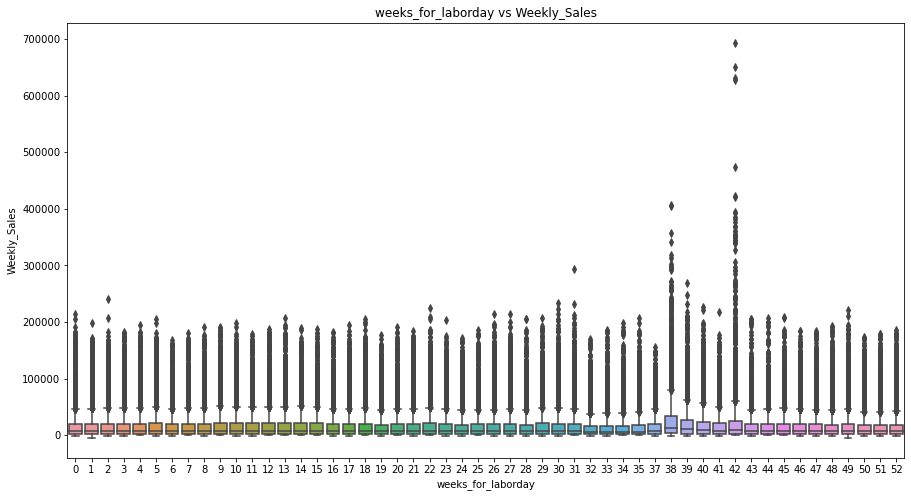

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['weeks_for_laborday'], df['Weekly_Sales'])
plt.title('weeks_for_laborday vs Weekly_Sales')
plt.show()

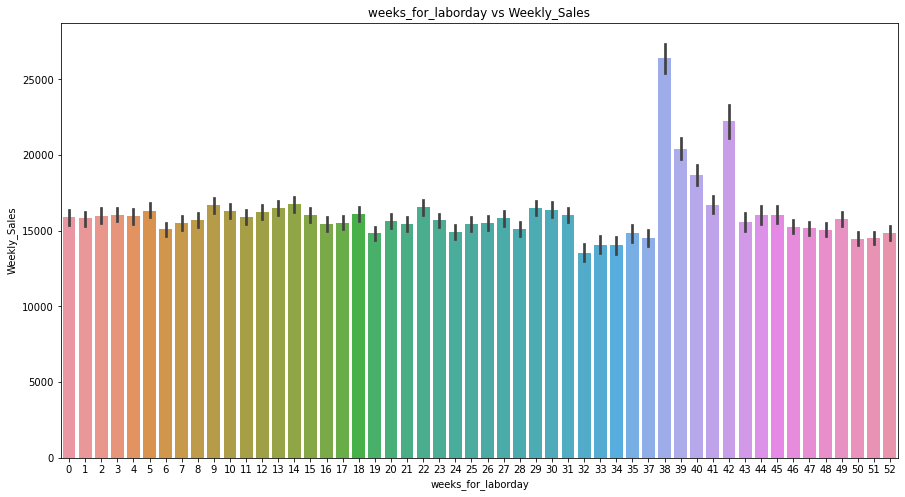

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['weeks_for_laborday'], df['Weekly_Sales'])
plt.title('weeks_for_laborday vs Weekly_Sales')
plt.show()

##### Observation:
    Weeks left show a little effect on weekly sales but not much.
    When 38, 39 and 42 weeks left, weekly sales is high because of christmas and thanksgiving week is near.

#### 10.2 No of weeks left for superbowl

In [69]:
def get_weeks_for_superbowl(data):
    no_of_weeks_left_list = []
    for i in data['Week']:
        week_of_superbowl = 6
        no_of_weeks_left = week_of_superbowl - i
        if no_of_weeks_left>=0:
            no_of_weeks_left_list.append(no_of_weeks_left)
        else:
            no_of_weeks_left_list.append(no_of_weeks_left+53)
    data['weeks_for_superbowl'] = no_of_weeks_left_list
    return data

In [ ]:
df = get_weeks_for_superbowl(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,5,0,40,3.0,3,1,47,42,31,1
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,5,0,40,3.0,3,1,47,42,31,1
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,5,0,40,3.0,3,1,47,42,31,1
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,5,0,40,3.0,3,1,47,42,31,1
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,5,0,40,3.0,3,1,47,42,31,1


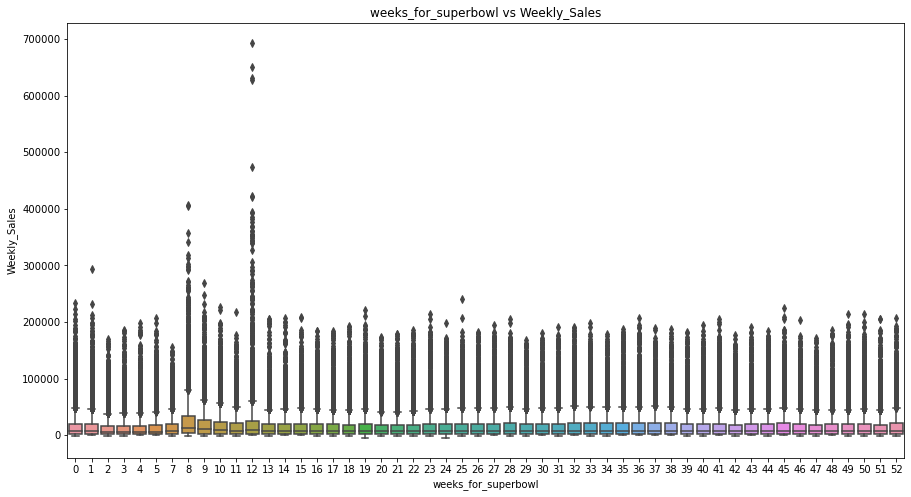

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['weeks_for_superbowl'], df['Weekly_Sales'])
plt.title('weeks_for_superbowl vs Weekly_Sales')
plt.show()

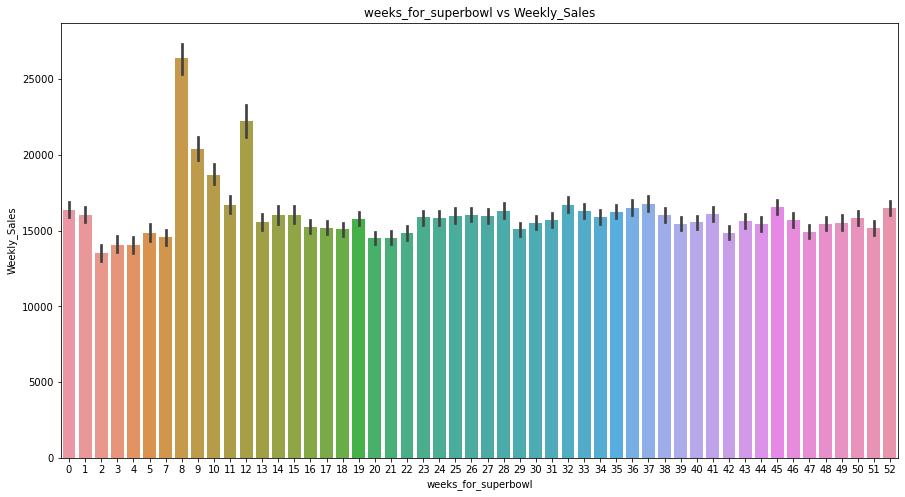

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['weeks_for_superbowl'], df['Weekly_Sales'])
plt.title('weeks_for_superbowl vs Weekly_Sales')
plt.show()

##### Observation:
    Weeks left show a little effect on weekly sales but not much.
    When 8, 9 and 12 weeks left, weekly sales is high because of christmas and thanksgiving week is near.

### 10. No of weeks left for next holiday

In [70]:
def get_weeks_left(data):
    no_of_weeks_left_list = []
    week_of_christmas = 52
    week_of_thanksgiving = 47
    week_of_laborday = 36
    week_of_superbowl = 6
    for i in data['Week']:
        if i <= 6:
            no_of_weeks_left = week_of_superbowl - i
            no_of_weeks_left_list.append(no_of_weeks_left)
        elif i > 6 and i <= 36:
            no_of_weeks_left = week_of_laborday - i
            no_of_weeks_left_list.append(no_of_weeks_left)
        elif i > 36 and i <= 47:
            no_of_weeks_left = week_of_thanksgiving - i
            no_of_weeks_left_list.append(no_of_weeks_left)
        elif i > 47 and i <= 52:
            no_of_weeks_left = week_of_christmas - i
            no_of_weeks_left_list.append(no_of_weeks_left)
    data['no_of_weeks_for_next_holiday'] = no_of_weeks_left_list
    return data

In [ ]:
df = get_weeks_left(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl,no_of_weeks_for_next_holiday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,0,40,3.0,3,1,47,42,31,1,1
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,0,40,3.0,3,1,47,42,31,1,1
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,0,40,3.0,3,1,47,42,31,1,1
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,0,40,3.0,3,1,47,42,31,1,1
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,0,40,3.0,3,1,47,42,31,1,1


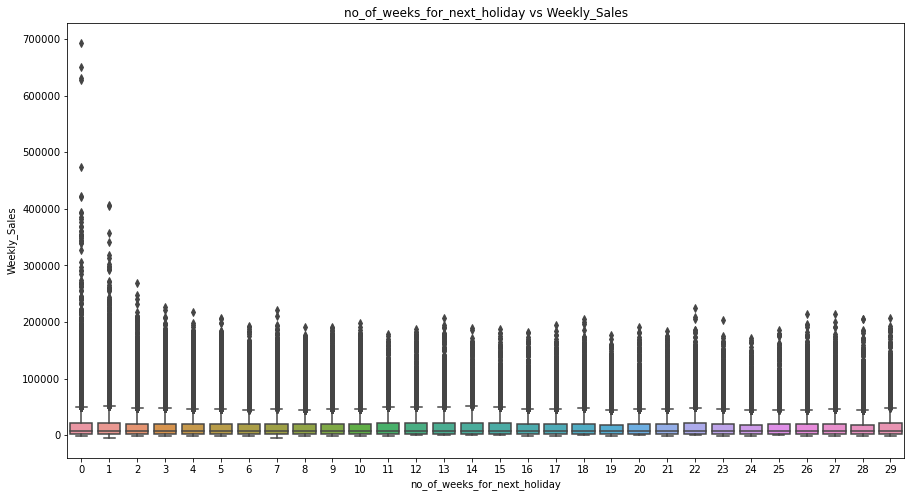

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['no_of_weeks_for_next_holiday'], df['Weekly_Sales'])
plt.title('no_of_weeks_for_next_holiday vs Weekly_Sales')
plt.show()

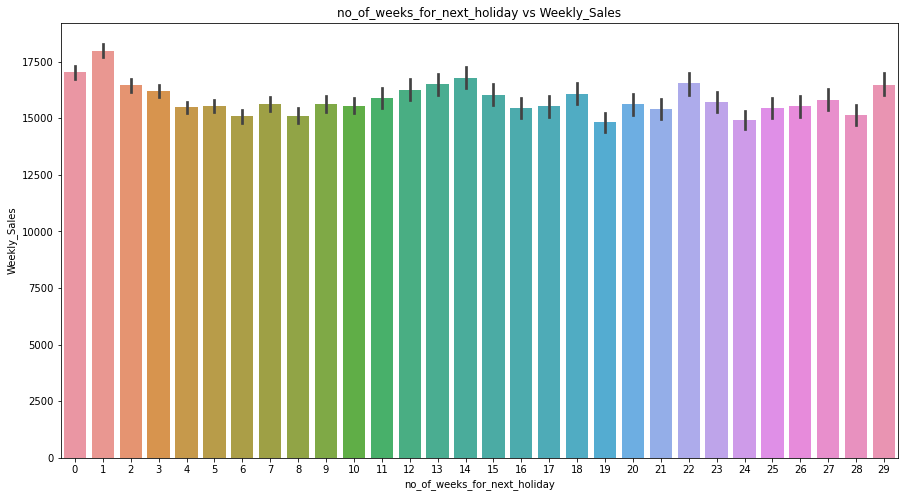

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df['no_of_weeks_for_next_holiday'], df['Weekly_Sales'])
plt.title('no_of_weeks_for_next_holiday vs Weekly_Sales')
plt.show()

##### Observation:
    From boxplot, high weekly sales of more than 300,000 are made when holiday week is near.
    From barplot, weekly sales inceases when holiday is near.

### Imputing markdown values by 0

In [ ]:
# When markdown value is 0 means no markdown event was organised so we impute 0.
df['MarkDown1']=df['MarkDown1'].fillna(0)
df['MarkDown2']=df['MarkDown2'].fillna(0)
df['MarkDown3']=df['MarkDown3'].fillna(0)
df['MarkDown4']=df['MarkDown4'].fillna(0)
df['MarkDown5']=df['MarkDown5'].fillna(0)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl,no_of_weeks_for_next_holiday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1


### Label encoding of IsHoliday

In [71]:
def isholiday_le(data):
    IsHoliday = []
    for i in data['IsHoliday']:
        if i == False:
            IsHoliday.append(0)
        else:
            IsHoliday.append(1)
    data['IsHoliday'] = IsHoliday
    return data

In [ ]:
df = isholiday_le(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl,no_of_weeks_for_next_holiday
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1


### Label encoding of type feature

In [ ]:
df1 = df.groupby('Type')['Weekly_Sales'].mean()
df1

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

In [72]:
def type_le(data):
    store_type = []
    for i in data['Type']:
        if i == 'A':
            store_type.append(1)
        elif i == 'B':
            store_type.append(2)
        else:
            store_type.append(3)
    data['Type'] = store_type
    return data

In [ ]:
df = type_le(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl,no_of_weeks_for_next_holiday
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1


### Encoding Date feature

In [73]:
def date_to_numeric(data):
    dates = []
    for i in data['Date']:
        i = datetime.datetime.strptime(i,"%Y-%m-%d")
        i = i.timestamp()
        dates.append(i)
    data['Date'] = dates
    return data

In [ ]:
df = date_to_numeric(df)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl,no_of_weeks_for_next_holiday
0,1,1,1.265308e+09,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
1,1,2,1.265308e+09,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
2,1,3,1.265308e+09,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
3,1,4,1.265308e+09,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1
4,1,5,1.265308e+09,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,0,40,3.0,3,1,47,42,31,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Store                         421570 non-null  int64  
 1   Dept                          421570 non-null  int64  
 2   Date                          421570 non-null  float64
 3   Weekly_Sales                  421570 non-null  float64
 4   IsHoliday                     421570 non-null  int64  
 5   Temperature                   421570 non-null  float64
 6   Fuel_Price                    421570 non-null  float64
 7   MarkDown1                     421570 non-null  float64
 8   MarkDown2                     421570 non-null  float64
 9   MarkDown3                     421570 non-null  float64
 10  MarkDown4                     421570 non-null  float64
 11  MarkDown5                     421570 non-null  float64
 12  CPI                           421570 non-nul

### Remove Negative Sales

In [ ]:
df = df[df['Weekly_Sales']>0]

In [ ]:
df.shape

(420212, 30)

### Remove duplicate datapoints

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(420212, 30)

### Correlation Matrix

In [ ]:
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas#:~:text=corr%20%3D%20df.corr()-,corr.style.background_gradient(cmap%3D%27coolwarm%27),-%23%20%27RdBu_r%27%2C%20%27BrBG_r%27%2C%20%26%20PuOr_r
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl,no_of_weeks_for_next_holiday
Store,1.0000,0.0240,0.0034,-0.0852,-0.0005,-0.0501,0.0653,-0.0598,-0.0338,-0.0203,-0.0427,-0.0125,-0.2111,0.2086,0.2264,-0.1829,-0.0000,0.0010,0.0030,0.0010,-0.0006,-0.0509,0.0580,-0.0008,0.0003,-0.0010,-0.0014,-0.0015,0.0004,-0.0006
Dept,0.0240,1.0000,0.0041,0.1480,0.0009,0.0044,0.0036,0.0015,0.0006,0.0015,0.0019,0.0027,-0.0075,0.0078,0.0037,-0.0030,-0.0007,0.0009,0.0037,0.0009,0.0008,0.0043,0.0037,-0.0008,-0.0006,-0.0009,0.0002,-0.0021,-0.0003,-0.0012
Date,0.0034,0.0041,1.0000,-0.0007,-0.0130,0.1471,0.7719,0.4709,0.1280,0.0487,0.2975,0.4236,0.0770,-0.2434,0.0042,-0.0054,0.0418,0.1464,0.9415,0.1603,-0.0262,0.1453,0.7170,-0.0037,0.0795,-0.1603,-0.1586,0.0281,-0.1073,-0.1511
Weekly_Sales,-0.0852,0.1480,-0.0007,1.0000,0.0128,-0.0023,-0.0001,0.0472,0.0207,0.0386,0.0375,0.0505,-0.0209,-0.0259,-0.1822,0.2438,-0.0062,0.0284,-0.0101,0.0277,0.0108,-0.0020,-0.0030,0.0030,-0.0091,-0.0277,0.0116,0.0019,-0.0116,-0.0145
IsHoliday,-0.0005,0.0009,-0.0130,0.0128,1.0000,-0.1559,-0.0783,-0.0035,0.2076,0.2665,0.0116,-0.0152,-0.0019,0.0105,-0.0008,0.0006,0.0455,0.1234,-0.0567,0.1282,0.9210,-0.1499,-0.0686,0.3818,0.0127,-0.1282,0.0055,0.0031,-0.3211,-0.3331
Temperature,-0.0501,0.0044,0.1471,-0.0023,-0.1559,1.0000,0.1439,-0.0264,-0.1797,-0.0560,-0.0503,-0.0148,0.1821,0.0967,0.0430,-0.0583,0.0268,0.2360,0.0658,0.2363,-0.1388,0.9879,0.1500,-0.1537,0.0602,-0.2363,-0.5252,-0.4800,0.2275,-0.0894
Fuel_Price,0.0653,0.0036,0.7719,-0.0001,-0.0783,0.1439,1.0000,0.2971,0.0292,0.0186,0.1666,0.2154,-0.1642,-0.0339,0.0297,0.0034,0.0281,-0.0409,0.7796,-0.0311,-0.0712,0.1413,0.9308,-0.1009,0.0650,0.0311,-0.0823,-0.0953,0.1625,0.1147
MarkDown1,-0.0598,0.0015,0.4709,0.0472,-0.0035,-0.0264,0.2971,1.0000,0.1749,-0.0144,0.8389,0.4151,0.0109,-0.1052,-0.1263,0.1698,-0.1262,-0.0892,0.5010,-0.0936,0.0125,-0.0235,0.2759,0.0743,-0.1209,0.0936,0.0577,-0.0385,-0.0197,-0.0042
MarkDown2,-0.0338,0.0006,0.1280,0.0207,0.2076,-0.1797,0.0292,0.1749,1.0000,-0.0061,0.1132,0.1317,-0.0036,-0.0414,-0.0553,0.0784,0.0520,-0.0194,0.1319,-0.0128,0.0694,-0.1770,0.0294,0.0303,0.0658,0.0128,0.1860,0.1016,-0.1506,-0.0757
MarkDown3,-0.0203,0.0015,0.0487,0.0386,0.2665,-0.0560,0.0186,-0.0144,-0.0061,1.0000,-0.0120,0.0425,-0.0058,-0.0181,-0.0240,0.0336,0.0722,0.1160,0.0068,0.1223,0.1765,-0.0529,0.0076,0.0660,0.0538,-0.1223,-0.1150,0.0901,-0.0897,-0.0967


In [ ]:
df.to_csv('Final_data_train_FE.csv', index_label=False)

## FE on test data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
feature_data = pd.read_csv('/content/drive/MyDrive/features.csv')
store_data = pd.read_csv('/content/drive/MyDrive/stores.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [4]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Text(0.5, 1.0, 'Unemployment vs Date')

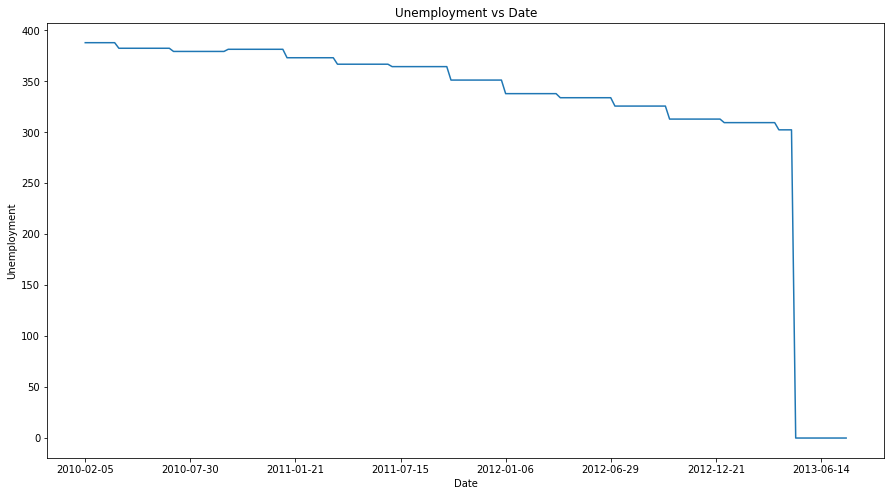

In [5]:
# Grouping date and plotting total unemployment
df1 = feature_data.groupby('Date')['Unemployment'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.title('Unemployment vs Date')

Text(0.5, 1.0, 'CPI vs Date')

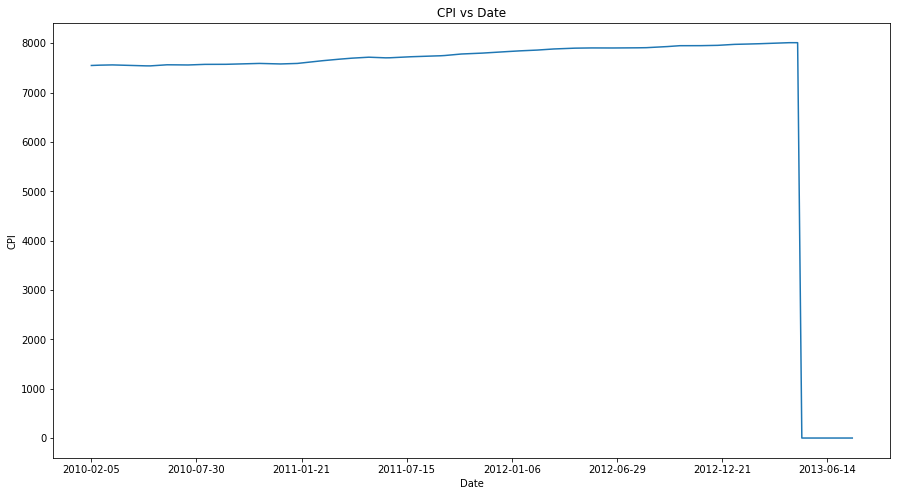

In [6]:
# Grouping date and plotting total unemployment
df1 = feature_data.groupby('Date')['CPI'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI vs Date')

Text(0.5, 1.0, 'MarkDown vs Date')

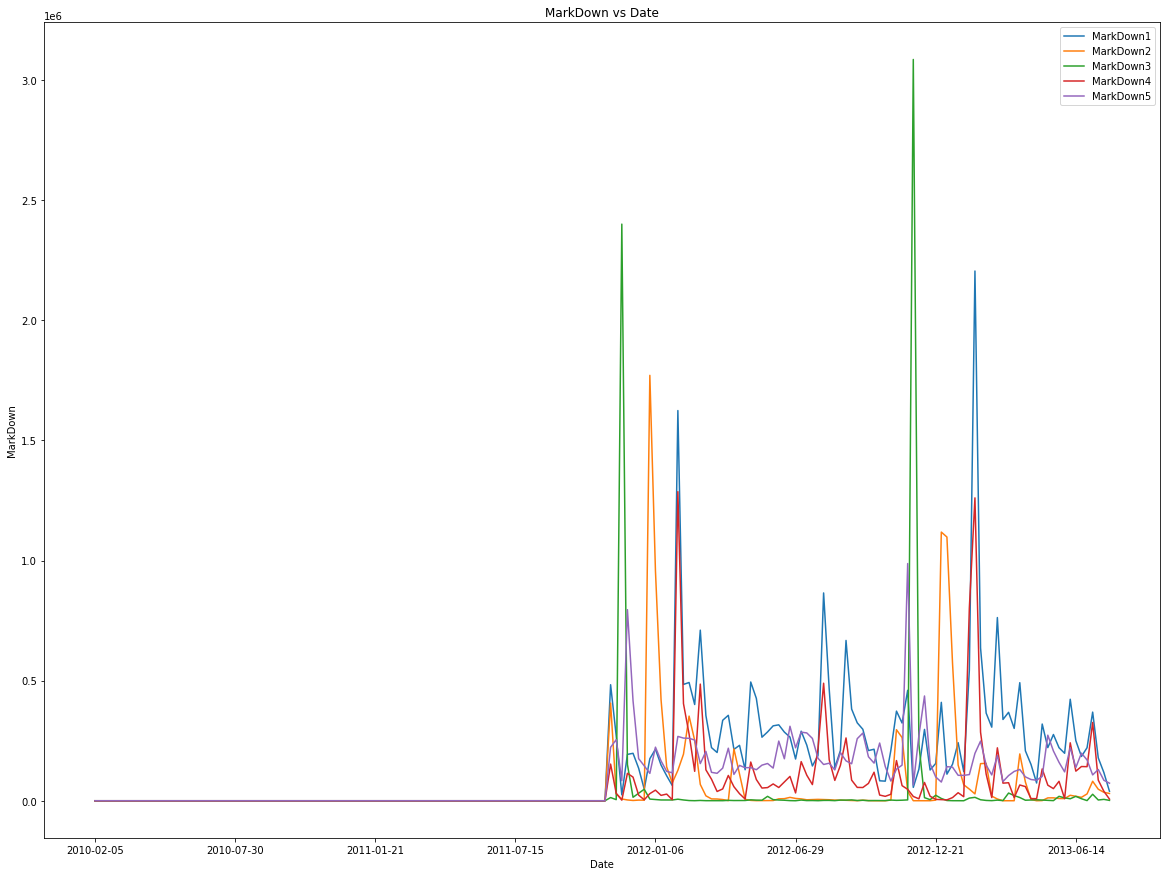

In [7]:
df1 = feature_data.groupby('Date')['MarkDown1'].sum()
df2 = feature_data.groupby('Date')['MarkDown2'].sum()
df3 = feature_data.groupby('Date')['MarkDown3'].sum()
df4 = feature_data.groupby('Date')['MarkDown4'].sum()
df5 = feature_data.groupby('Date')['MarkDown5'].sum()
plt.figure(figsize=(20,15))
df1.plot(label='MarkDown1')
df2.plot(label='MarkDown2')
df3.plot(label='MarkDown3')
df4.plot(label='MarkDown4')
df5.plot(label='MarkDown5')
plt.xlabel('Date')
plt.ylabel('MarkDown')
plt.legend()
plt.title('MarkDown vs Date')

### Imputing markdown by 0

In [8]:
# When markdown value is 0 means no markdown event was organised so we impute 0.
feature_data['MarkDown1']=feature_data['MarkDown1'].fillna(0)
feature_data['MarkDown2']=feature_data['MarkDown2'].fillna(0)
feature_data['MarkDown3']=feature_data['MarkDown3'].fillna(0)
feature_data['MarkDown4']=feature_data['MarkDown4'].fillna(0)
feature_data['MarkDown5']=feature_data['MarkDown5'].fillna(0)

In [9]:
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


#### Imputing CPI and Unemployment

##### Sperating Null dataset and Not-null dataset

In [10]:
not_null_data = feature_data.dropna()
not_null_data = not_null_data.sort_values(by='Date')

In [11]:
not_null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         7605 non-null   int64  
 1   Date          7605 non-null   object 
 2   Temperature   7605 non-null   float64
 3   Fuel_Price    7605 non-null   float64
 4   MarkDown1     7605 non-null   float64
 5   MarkDown2     7605 non-null   float64
 6   MarkDown3     7605 non-null   float64
 7   MarkDown4     7605 non-null   float64
 8   MarkDown5     7605 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     7605 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 720.4+ KB


In [12]:
print('Starting date of not null values: ', not_null_data['Date'].min())
print('Ending date: of not null values', not_null_data['Date'].max())

Starting date of not null values:  2010-02-05
Ending date: of not null values 2013-04-26


In [13]:
print(type(not_null_data['Date'][0]))
not_null_data['Date'] = pd.to_datetime(not_null_data['Date'])
print(type(not_null_data['Date'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
not_null_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
182,2,2010-02-05,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
3094,18,2010-02-05,21.33,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,9.202,False
1092,7,2010-02-05,10.53,2.580,0.0,0.0,0.0,0.0,0.0,189.381697,9.014,False
7826,44,2010-02-05,31.53,2.666,0.0,0.0,0.0,0.0,0.0,126.442065,8.119,False


Text(0.5, 1.0, 'CPI vs Date')

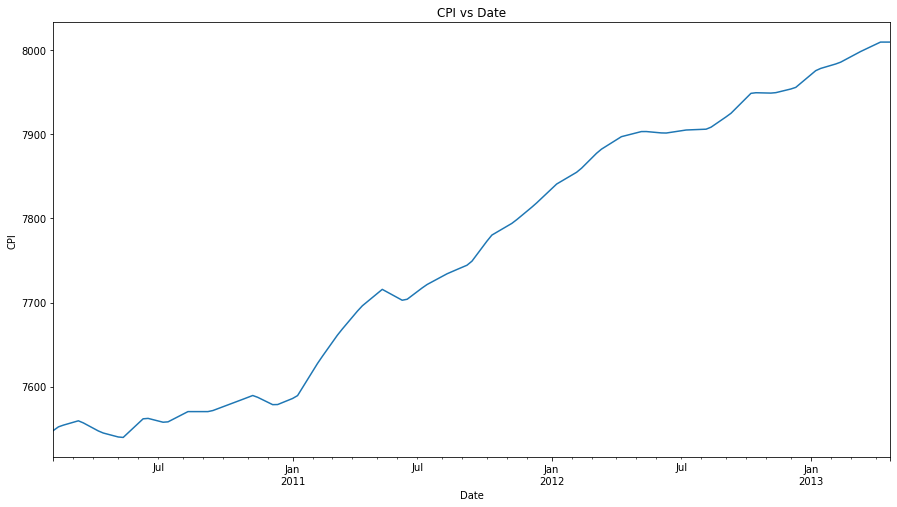

In [17]:
# Grouping date and plotting total unemployment
df1 = not_null_data.groupby('Date')['CPI'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI vs Date')

Text(0.5, 1.0, 'Unemployment vs Date')

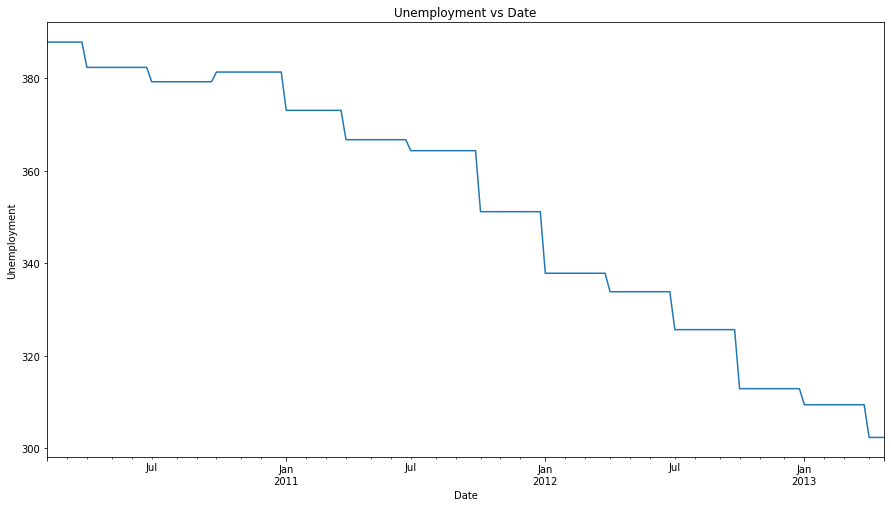

In [18]:
# Grouping date and plotting total unemployment
df1 = not_null_data.groupby('Date')['Unemployment'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.title('Unemployment vs Date')

##### We can observe upward trend in CPI and downward trend in Unemployment over date then we can apply time series model on these features.

In [15]:
null_data = feature_data[feature_data['CPI'].isnull()]
null_data = null_data.sort_values(by='Date')

In [16]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 169 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         585 non-null    int64  
 1   Date          585 non-null    object 
 2   Temperature   585 non-null    float64
 3   Fuel_Price    585 non-null    float64
 4   MarkDown1     585 non-null    float64
 5   MarkDown2     585 non-null    float64
 6   MarkDown3     585 non-null    float64
 7   MarkDown4     585 non-null    float64
 8   MarkDown5     585 non-null    float64
 9   CPI           0 non-null      float64
 10  Unemployment  0 non-null      float64
 11  IsHoliday     585 non-null    bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 55.4+ KB


In [19]:
print(type(null_data['Date'].iloc()[0]))
null_data['Date'] = pd.to_datetime(null_data['Date'])
print(type(null_data['Date'].iloc()[0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
null_data.drop(['CPI', 'Unemployment'], axis=1, inplace=True)

In [21]:
null_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday
169,1,2013-05-03,66.66,3.386,2298.63,2.0,129.90,55.46,1301.04,False
715,4,2013-05-03,64.18,3.369,13789.79,14.0,218.21,7299.53,8146.91,False
5083,28,2013-05-03,76.84,3.671,7588.35,3.0,106.95,7193.46,8558.10,False
3263,18,2013-05-03,55.96,3.601,7793.73,24.0,199.02,3398.66,1158.86,False
5265,29,2013-05-03,53.24,3.601,6113.18,4.0,24.61,1794.82,2871.71,False


### Imputing using Prophet

#### 1. Using Prophet to predict missing CPI data

In [22]:
from fbprophet import Prophet
from tqdm import tqdm

prediction_df = pd.DataFrame()
for i in tqdm(range(1,46)):
  model = Prophet()

  data = not_null_data[['Date', 'CPI']][not_null_data['Store']==i]
  data = data.rename(columns = {'Date': 'ds', 'CPI': 'y'}, inplace = False)

  model.fit(data)

  data1 = pd.DataFrame()
  data1['ds'] = null_data['Date'][null_data['Store']==i]
  prediction = model.predict(data1)
  pred_df = pd.DataFrame()
  pred_df['yhat'] = prediction['yhat']
  pred_df['Date'] = prediction['ds']
  pred_df['Store'] = [str(i)]*len(pred_df)
  merged = [prediction_df,pred_df]
  prediction_df = pd.concat(merged, axis=0)

  0%|          | 0/45 [00:00<?, ?it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  2%|▏         | 1/45 [00:03<02:45,  3.77s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  4%|▍         | 2/45 [00:06<02:18,  3.21s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  7%|▋         | 3/45 [00:09<02:05,  2.99s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
prediction_df.head()

,yhat,Date,Store
0,225.331949,2013-05-03,1
1,225.443440,2013-05-10,1
2,225.564089,2013-05-17,1
3,225.681645,2013-05-24,1
4,225.781211,2013-05-31,1


In [24]:
prediction_df['Store'] = prediction_df['Store'].apply(lambda x: int(x))

#### 2. Using Prophet to predict missing Unemployment data

In [25]:
from fbprophet import Prophet
from tqdm import tqdm

prediction_df1 = pd.DataFrame()
for i in tqdm(range(1,46)):
  model = Prophet()

  data = not_null_data[['Date', 'Unemployment']][not_null_data['Store']==i]
  data = data.rename(columns = {'Date': 'ds', 'Unemployment': 'y'}, inplace = False)

  model.fit(data)

  data1 = pd.DataFrame()
  data1['ds'] = null_data['Date'][null_data['Store']==i]
  prediction = model.predict(data1)
  pred_df = pd.DataFrame()
  pred_df['yhat'] = prediction['yhat']
  pred_df['Date'] = prediction['ds']
  pred_df['Store'] = [str(i)]*len(pred_df)
  merged = [prediction_df1,pred_df]
  prediction_df1 = pd.concat(merged, axis=0)

  0%|          | 0/45 [00:00<?, ?it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  2%|▏         | 1/45 [00:02<01:39,  2.27s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  4%|▍         | 2/45 [00:04<01:38,  2.29s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  7%|▋         | 3/45 [00:06<01:34,  2.25s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
prediction_df1.head()

,yhat,Date,Store
0,6.332477,2013-05-03,1
1,6.337321,2013-05-10,1
2,6.337705,2013-05-17,1
3,6.338903,2013-05-24,1
4,6.341657,2013-05-31,1


In [27]:
prediction_df['Unemployment'] = prediction_df1['yhat']

In [28]:
prediction_df.rename(columns = {'yhat':'CPI'}, inplace=True)

In [29]:
prediction_df.head()

,CPI,Date,Store,Unemployment
0,225.331949,2013-05-03,1,6.332477
1,225.443440,2013-05-10,1,6.337321
2,225.564089,2013-05-17,1,6.337705
3,225.681645,2013-05-24,1,6.338903
4,225.781211,2013-05-31,1,6.341657


In [30]:
prediction_df.to_csv('/content/drive/MyDrive/prophet_predictions.csv')

In [31]:
df = null_data.merge(prediction_df, on=['Store', 'Date'], how='inner')

In [32]:
df = df.sort_values(by=['Store', 'Date'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 584
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         585 non-null    int64         
 1   Date          585 non-null    datetime64[ns]
 2   Temperature   585 non-null    float64       
 3   Fuel_Price    585 non-null    float64       
 4   MarkDown1     585 non-null    float64       
 5   MarkDown2     585 non-null    float64       
 6   MarkDown3     585 non-null    float64       
 7   MarkDown4     585 non-null    float64       
 8   MarkDown5     585 non-null    float64       
 9   IsHoliday     585 non-null    bool          
 10  CPI           585 non-null    float64       
 11  Unemployment  585 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 55.4 KB


In [34]:
final_data_merged_prophet = pd.concat([not_null_data, df])

In [35]:
final_data_merged_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 584
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 775.8 KB


In [36]:
final_data_merged_prophet = final_data_merged_prophet.sort_values(by=['Store', 'Date'])

In [40]:
prediction_df[prediction_df['Store']==1]

,CPI,Date,Store,Unemployment
0,225.331949,2013-05-03,1,6.332477
1,225.443440,2013-05-10,1,6.337321
2,225.564089,2013-05-17,1,6.337705
3,225.681645,2013-05-24,1,6.338903
4,225.781211,2013-05-31,1,6.341657
5,225.844716,2013-06-07,1,6.346250
6,225.855371,2013-06-14,1,6.355881
7,225.809687,2013-06-21,1,6.371971
8,225.726902,2013-06-28,1,6.388007
9,225.642287,2013-07-05,1,6.392933


In [42]:
final_data_merged_prophet[final_data_merged_prophet['Store']==1]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,2013-06-28,83.94,3.495,4205.98,796.70,6.84,3816.78,4812.74,225.726902,6.388007,False
406,1,2013-07-05,79.85,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,225.642287,6.392933,False
491,1,2013-07-12,83.12,3.400,6089.94,1362.42,209.62,2367.42,2651.05,225.585584,6.382898,False
519,1,2013-07-19,79.26,3.556,3117.04,1060.39,199.05,1012.30,5381.72,225.563320,6.367446,False


Text(0.5, 1.0, 'CPI vs Date')

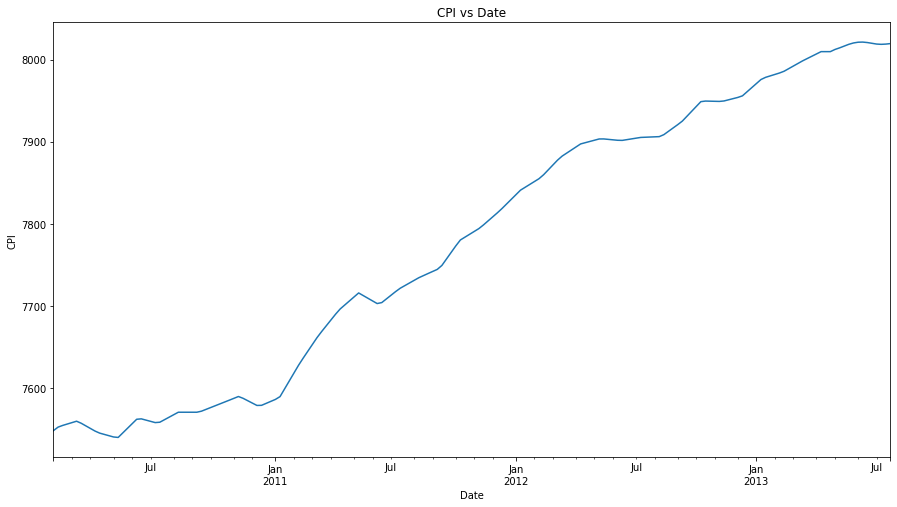

In [38]:
# Grouping date and plotting total unemployment
df1 = final_data_merged_prophet.groupby('Date')['CPI'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI vs Date')

Text(0.5, 1.0, 'Unemployment vs Date')

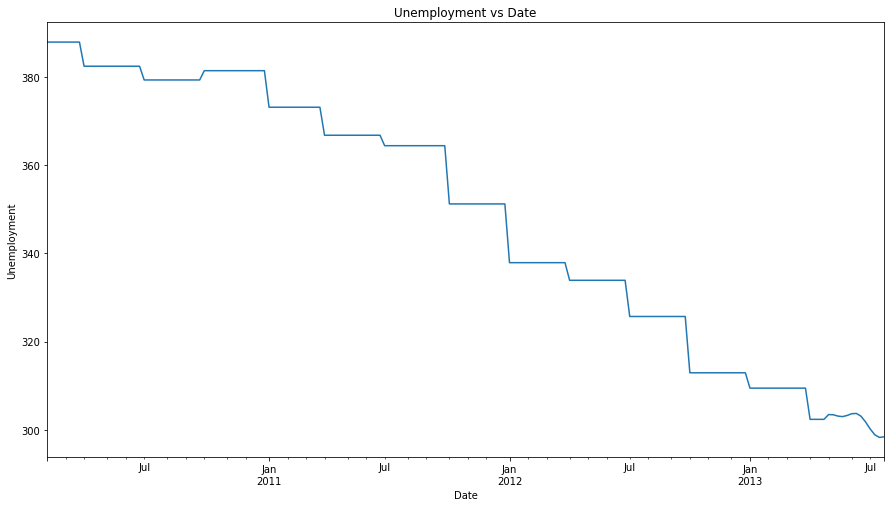

In [39]:
# Grouping date and plotting total unemployment
df1 = final_data_merged_prophet.groupby('Date')['Unemployment'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.title('Unemployment vs Date')

In [54]:
final_data_merged_prophet['Date'] = final_data_merged_prophet['Date'].apply(lambda x: str(x).split(' ')[0])

In [55]:
final_data_merged_prophet.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [56]:
df = test_data.merge(final_data_merged_prophet, on=['Store', 'IsHoliday', 'Date'], how='inner')

In [57]:
df = df.merge(store_data, on=['Store'], how='left')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     115064 non-null  float64
 7   MarkDown2     115064 non-null  float64
 8   MarkDown3     115064 non-null  float64
 9   MarkDown4     115064 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           115064 non-null  float64
 12  Unemployment  115064 non-null  float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [59]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


#### 1. Day, month, week and year.

In [74]:
# Converting date to day, month, week and year.

df = get_day_month_year_week(df)
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,day,month,year,Week
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2,11,2012,44
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2,11,2012,44
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2,11,2012,44
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2,11,2012,44
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2,11,2012,44


#### 2. Holiday_Type

In [75]:
df = get_holiday_type(df)

In [76]:
df[df['IsHoliday']==True].head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,day,month,year,Week,Holiday_Type
213,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,23,11,2012,47,2
214,1,2,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,23,11,2012,47,2
215,1,3,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,23,11,2012,47,2
216,1,4,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,23,11,2012,47,2
217,1,5,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,23,11,2012,47,2


#### 3. Temperature Categories

In [77]:
df = temp_cat(df)

In [78]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,day,month,year,Week,Holiday_Type,Temperature_Cat
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,A,151315,2,11,2012,44,0,60
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,A,151315,2,11,2012,44,0,60
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,A,151315,2,11,2012,44,0,60
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,A,151315,2,11,2012,44,0,60
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,A,151315,2,11,2012,44,0,60


#### 4. Fuel Categories

In [79]:
df = fuel_cat(df)

In [80]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,Type,Size,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,6.573,A,151315,2,11,2012,44,0,60,3.5
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,6.573,A,151315,2,11,2012,44,0,60,3.5
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,6.573,A,151315,2,11,2012,44,0,60,3.5
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,6.573,A,151315,2,11,2012,44,0,60,3.5
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,6.573,A,151315,2,11,2012,44,0,60,3.5


#### 5. Holiday_month

In [81]:
df = get_holiday_month(df)

In [82]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Type,Size,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,A,151315,2,11,2012,44,0,60,3.5,2
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,A,151315,2,11,2012,44,0,60,3.5,2
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,A,151315,2,11,2012,44,0,60,3.5,2
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,A,151315,2,11,2012,44,0,60,3.5,2
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,A,151315,2,11,2012,44,0,60,3.5,2


#### 6. Week of the Month

In [83]:
df = get_week_of_month(df)

In [84]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,151315,2,11,2012,44,0,60,3.5,2,1
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,151315,2,11,2012,44,0,60,3.5,2,1
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,151315,2,11,2012,44,0,60,3.5,2,1
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,151315,2,11,2012,44,0,60,3.5,2,1
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,151315,2,11,2012,44,0,60,3.5,2,1


#### 7. No of weeks left for Christmas

In [85]:
df = get_weeks_for_christmas(df)

In [86]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,day,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2,11,2012,44,0,60,3.5,2,1,8
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2,11,2012,44,0,60,3.5,2,1,8
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2,11,2012,44,0,60,3.5,2,1,8
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2,11,2012,44,0,60,3.5,2,1,8
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2,11,2012,44,0,60,3.5,2,1,8


#### 8. No of weeks left for thanksgiving

In [87]:
df = get_weeks_for_thanksgiving(df)

In [88]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,month,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,2012,44,0,60,3.5,2,1,8,3
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,2012,44,0,60,3.5,2,1,8,3
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,2012,44,0,60,3.5,2,1,8,3
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,2012,44,0,60,3.5,2,1,8,3
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,2012,44,0,60,3.5,2,1,8,3


#### 9. No of weeks left for laborday

In [89]:
df = get_weeks_for_laborday(df)

In [90]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,year,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2012,44,0,60,3.5,2,1,8,3,45
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2012,44,0,60,3.5,2,1,8,3,45
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2012,44,0,60,3.5,2,1,8,3,45
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2012,44,0,60,3.5,2,1,8,3,45
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,2012,44,0,60,3.5,2,1,8,3,45


#### 10. No of weeks left for superbowl

In [91]:
df = get_weeks_for_superbowl(df)

In [92]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Week,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,44,0,60,3.5,2,1,8,3,45,15
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,44,0,60,3.5,2,1,8,3,45,15
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,44,0,60,3.5,2,1,8,3,45,15
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,44,0,60,3.5,2,1,8,3,45,15
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,44,0,60,3.5,2,1,8,3,45,15


#### 11. No of weeks left for next holiday

In [93]:
df = get_weeks_left(df)

In [94]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl,no_of_weeks_for_next_holiday
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Store                         115064 non-null  int64  
 1   Dept                          115064 non-null  int64  
 2   Date                          115064 non-null  object 
 3   IsHoliday                     115064 non-null  bool   
 4   Temperature                   115064 non-null  float64
 5   Fuel_Price                    115064 non-null  float64
 6   MarkDown1                     115064 non-null  float64
 7   MarkDown2                     115064 non-null  float64
 8   MarkDown3                     115064 non-null  float64
 9   MarkDown4                     115064 non-null  float64
 10  MarkDown5                     115064 non-null  float64
 11  CPI                           115064 non-null  float64
 12  Unemployment                  115064 non-nul

#### IsHoliday Label Encoding

In [96]:
df = isholiday_le(df)

#### Type Label Encoding

In [97]:
df = type_le(df)

#### Date Label Encoding

In [99]:
df = date_to_numeric(df)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Store                         115064 non-null  int64  
 1   Dept                          115064 non-null  int64  
 2   Date                          115064 non-null  float64
 3   IsHoliday                     115064 non-null  int64  
 4   Temperature                   115064 non-null  float64
 5   Fuel_Price                    115064 non-null  float64
 6   MarkDown1                     115064 non-null  float64
 7   MarkDown2                     115064 non-null  float64
 8   MarkDown3                     115064 non-null  float64
 9   MarkDown4                     115064 non-null  float64
 10  MarkDown5                     115064 non-null  float64
 11  CPI                           115064 non-null  float64
 12  Unemployment                  115064 non-nul

In [101]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Holiday_Type,Temperature_Cat,Fuel_Price_Cat,Holiday_Month,Week_of_the_month,weeks_for_christmas,weeks_for_thanksgiving,weeks_for_laborday,weeks_for_superbowl,no_of_weeks_for_next_holiday
0,1,1,1.351814e+09,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3
1,1,2,1.351814e+09,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3
2,1,3,1.351814e+09,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3
3,1,4,1.351814e+09,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3
4,1,5,1.351814e+09,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,60,3.5,2,1,8,3,45,15,3


In [102]:
df.to_csv('Test_data_final.csv')